In [9]:
import pandas as pd
import random

# Define entry points (x = 2)
entry_nodes = [(2, y) for y in range(1, 5)]

# Define exit points (x = 6)
exit_nodes = [(6, y) for y in range(1, 5)]

# Define 7 unique charging station positions in x = 3 to x = 5
charging_nodes = set()
while len(charging_nodes) < 7:
    x = random.choice([3, 4, 5])
    y = random.randint(1, 5)
    charging_nodes.add((x, y))

# Convert to DataFrame
entry_df = pd.DataFrame(entry_nodes, columns=["x", "y"])
entry_df["type"] = "entry"

exit_df = pd.DataFrame(exit_nodes, columns=["x", "y"])
exit_df["type"] = "exit"

charging_df = pd.DataFrame(list(charging_nodes), columns=["x", "y"])
charging_df["type"] = "charging"

# Combine all
all_nodes_df = pd.concat([entry_df, exit_df, charging_df], ignore_index=True)

# Save to CSV
all_nodes_df.to_csv("structured_nodes.csv", index=False)

print(all_nodes_df)

    x  y      type
0   2  1     entry
1   2  2     entry
2   2  3     entry
3   2  4     entry
4   6  1      exit
5   6  2      exit
6   6  3      exit
7   6  4      exit
8   5  5  charging
9   3  1  charging
10  5  4  charging
11  4  2  charging
12  5  3  charging
13  3  2  charging
14  5  2  charging


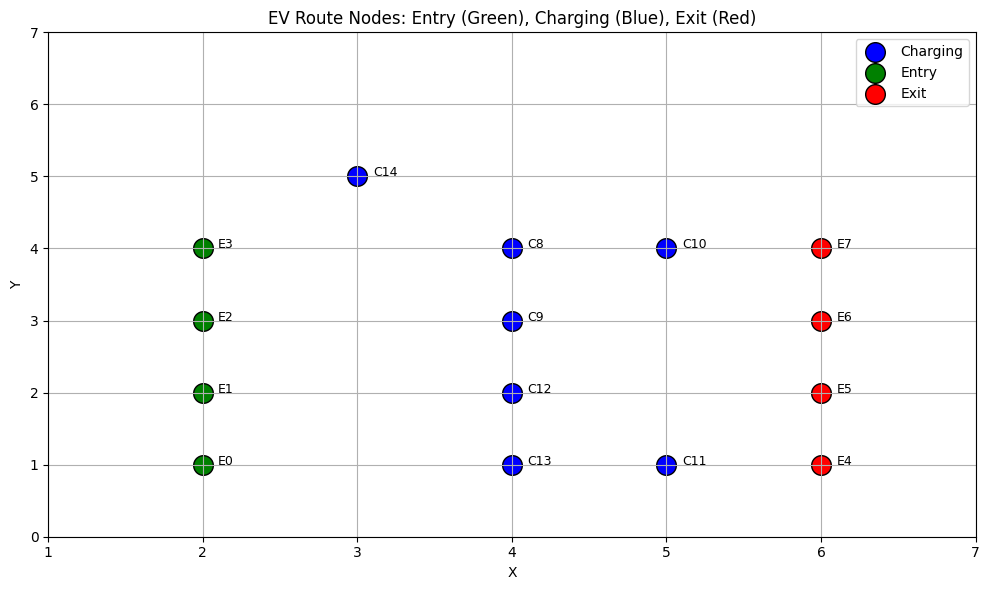

In [38]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the structured node data
df = pd.read_csv("structured_nodes.csv")

# Create color map
color_map = {
    "entry": "green",
    "exit": "red",
    "charging": "blue"
}

# Plot nodes
plt.figure(figsize=(10, 6))
for node_type, group in df.groupby("type"):
    plt.scatter(group["x"], group["y"], 
                c=color_map[node_type], 
                label=node_type.capitalize(), 
                s=200, edgecolors='black')

# Add labels for clarity
for i, row in df.iterrows():
    plt.text(row["x"] + 0.1, row["y"], f"{row['type'][0].upper()}{i}", fontsize=9)

plt.title("EV Route Nodes: Entry (Green), Charging (Blue), Exit (Red)")
plt.xlabel("X")
plt.ylabel("Y")
plt.grid(True)
plt.legend()
plt.xlim(1, 7)
plt.ylim(0, max(df["y"]) + 2)
plt.tight_layout()
plt.show()

In [39]:
import pandas as pd
import random

# Set up node parameters
entry_nodes = [{"id": f"E{i+1}", "x": 2, "y": y, "type": "entry"} for i, y in enumerate([2, 4, 6, 8])]
exit_nodes = [{"id": f"X{i+1}", "x": 12, "y": y, "type": "exit"} for i, y in enumerate([3, 5, 7, 9])]

charging_nodes = []
used_coords = set()
while len(charging_nodes) < 7:
    x = random.randint(3, 11)
    y = random.randint(1, 10)
    if (x, y) not in used_coords:
        used_coords.add((x, y))
        charging_nodes.append({
            "id": f"C{len(charging_nodes)+1}",
            "x": x,
            "y": y,
            "type": "charging"
        })

# Combine all nodes
all_nodes = entry_nodes + exit_nodes + charging_nodes

# Create DataFrame and save
df = pd.DataFrame(all_nodes)
df.to_csv("structured_nodes_updated.csv", index=False)

print("Data generated and saved.")
df.head()

Data generated and saved.


,id,x,y,type
0,E1,2,2,entry
1,E2,2,4,entry
2,E3,2,6,entry
3,E4,2,8,entry
4,X1,12,3,exit


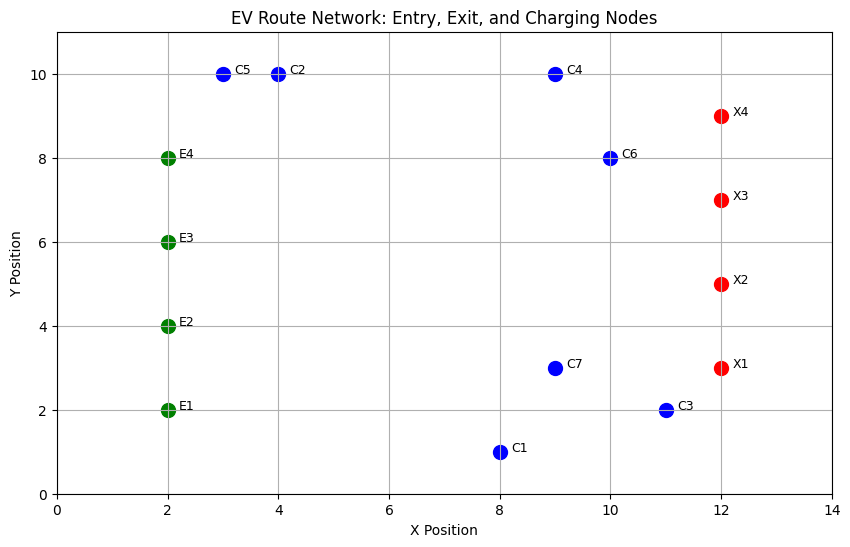

In [40]:
import matplotlib.pyplot as plt
import pandas as pd

# Load the generated data
df = pd.read_csv("structured_nodes_updated.csv")

# Define color map
color_map = {
    "entry": "green",
    "exit": "red",
    "charging": "blue"
}

# Plot
plt.figure(figsize=(10, 6))
for _, row in df.iterrows():
    plt.scatter(row["x"], row["y"], color=color_map[row["type"]], s=100)
    plt.text(row["x"] + 0.2, row["y"], row["id"], fontsize=9)

plt.title("EV Route Network: Entry, Exit, and Charging Nodes")
plt.xlabel("X Position")
plt.ylabel("Y Position")
plt.grid(True)
plt.xlim(0, 14)
plt.ylim(0, 11)
plt.show()

In [20]:
import networkx as nx
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Nodes
entry_nodes = [0, 1, 2, 3]
exit_nodes = [4, 5, 6, 7]
charging_nodes = [8, 9, 10, 11, 12, 13, 14]

# Coordinates
node_positions = {}

for i, y in enumerate([2, 4, 6, 8]):
    node_positions[entry_nodes[i]] = (2, y)

for i, y in enumerate([2, 4, 6, 8]):
    node_positions[exit_nodes[i]] = (12, y)

for i, node in enumerate(charging_nodes):
    x = np.random.randint(3, 11)
    y = np.random.randint(1, 10)
    node_positions[node] = (x, y)

# Create Graph
G = nx.Graph()
for node in node_positions:
    G.add_node(node, pos=node_positions[node])

# Add edges: fully connect graph (can be optimized later)
for i in G.nodes:
    for j in G.nodes:
        if i != j:
            xi, yi = node_positions[i]
            xj, yj = node_positions[j]
            distance = np.hypot(xi - xj, yi - yj)
            G.add_edge(i, j, weight=round(distance, 2))

# Save as CSV
edges_df = pd.DataFrame([
    {"from": u, "to": v, "distance": d["weight"]}
    for u, v, d in G.edges(data=True)
])
edges_df.to_csv("graph_edges.csv", index=False)

nodes_df = pd.DataFrame([
    {"node": n, "x": pos[0], "y": pos[1]}
    for n, pos in node_positions.items()
])
nodes_df.to_csv("graph_nodes.csv", index=False)

print(nodes_df.head())
print(edges_df.head())

   node   x  y
0     0   2  2
1     1   2  4
2     2   2  6
3     3   2  8
4     4  12  2
   from  to  distance
0     0   1       2.0
1     0   2       4.0
2     0   3       6.0
3     0   4      10.0
4     0   5      10.2


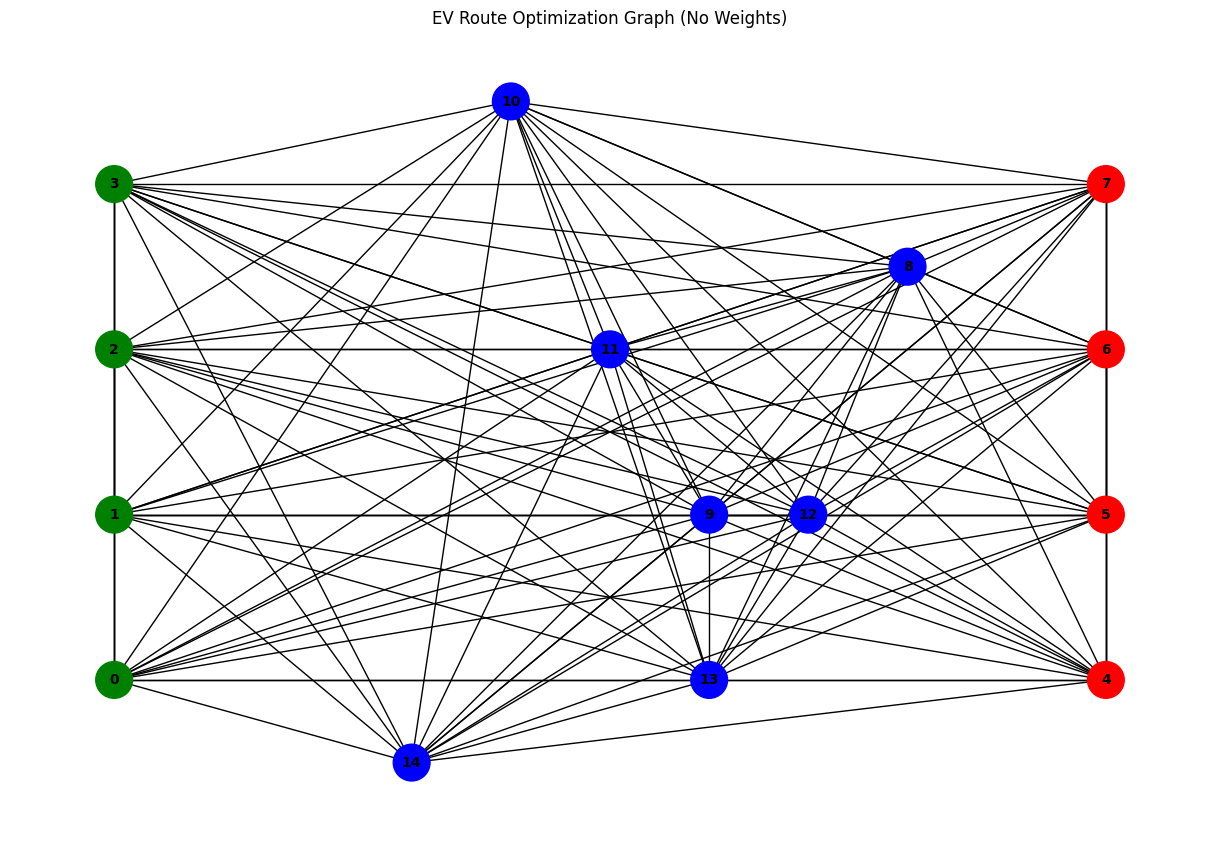

In [21]:
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt

# Load the node and edge data from CSV files
nodes_df = pd.read_csv("graph_nodes.csv")
edges_df = pd.read_csv("graph_edges.csv")

# Create a graph
G = nx.Graph()

# Add nodes with positions
for _, row in nodes_df.iterrows():
    G.add_node(row["node"], pos=(row["x"], row["y"]))

# Add edges with distances
for _, row in edges_df.iterrows():
    G.add_edge(row["from"], row["to"], weight=row["distance"])

# Get node positions
node_positions = nx.get_node_attributes(G, 'pos')

# Plot the graph without edge labels
plt.figure(figsize=(12, 8))

# Draw nodes with different colors
entry_nodes = [0, 1, 2, 3]
exit_nodes = [4, 5, 6, 7]
charging_nodes = [8, 9, 10, 11, 12, 13, 14]

entry_color = 'green'
exit_color = 'red'
charging_color = 'blue'

node_colors = [
    entry_color if node in entry_nodes else exit_color if node in exit_nodes else charging_color
    for node in G.nodes
]

# Draw the graph without edge labels
nx.draw(G, node_positions, with_labels=True, node_size=700, node_color=node_colors, font_size=10, font_weight='bold')

# Title and labels
plt.title("EV Route Optimization Graph (No Weights)")
plt.xlabel("X Coordinate")
plt.ylabel("Y Coordinate")
plt.show()

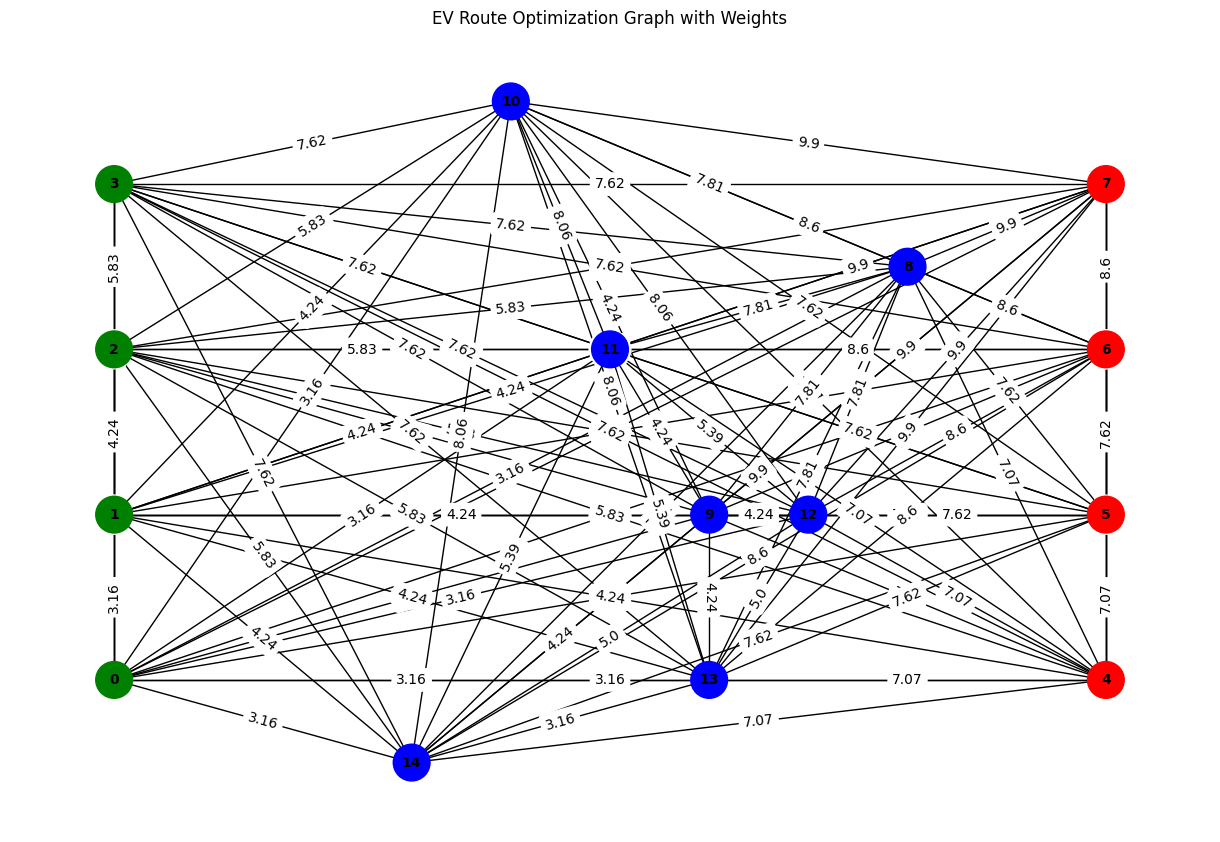

In [22]:
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt

# Load the node and edge data from CSV files
nodes_df = pd.read_csv("graph_nodes.csv")
edges_df = pd.read_csv("graph_edges.csv")

# Check if 'weight' column exists in the edge dataframe; if not, add it
if 'weight' not in edges_df.columns:
    # Recreate the graph and add the weights
    G = nx.Graph()

    # Add nodes with positions
    for _, row in nodes_df.iterrows():
        G.add_node(row["node"], pos=(row["x"], row["y"]))

    # Add edges with calculated distances (weights)
    for _, row in edges_df.iterrows():
        xi, yi = nodes_df[nodes_df["node"] == row["from"]][["x", "y"]].values[0]
        xj, yj = nodes_df[nodes_df["node"] == row["to"]][["x", "y"]].values[0]
        distance = round(((xi - xj) ** 2 + (yi - yj) ** 2) ** 0.5, 2)
        edges_df.loc[edges_df["from"] == row["from"], "weight"] = distance
        G.add_edge(row["from"], row["to"], weight=distance)

    # Save the updated edge file with weights
    edges_df.to_csv("graph_edges.csv", index=False)

# Create the graph again after adding weights
G = nx.Graph()

# Add nodes with positions
for _, row in nodes_df.iterrows():
    G.add_node(row["node"], pos=(row["x"], row["y"]))

# Add edges with distances (weights)
for _, row in edges_df.iterrows():
    G.add_edge(row["from"], row["to"], weight=row["weight"])

# Get node positions
node_positions = nx.get_node_attributes(G, 'pos')

# Plot the graph with edge weights
plt.figure(figsize=(12, 8))

# Draw nodes with different colors
entry_nodes = [0, 1, 2, 3]
exit_nodes = [4, 5, 6, 7]
charging_nodes = [8, 9, 10, 11, 12, 13, 14]

entry_color = 'green'
exit_color = 'red'
charging_color = 'blue'

node_colors = [
    entry_color if node in entry_nodes else exit_color if node in exit_nodes else charging_color
    for node in G.nodes
]

# Draw the graph with edge labels showing weights
nx.draw(G, node_positions, with_labels=True, node_size=700, node_color=node_colors, font_size=10, font_weight='bold')

# Draw edge labels with weights
edge_labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, node_positions, edge_labels=edge_labels)

# Title and labels
plt.title("EV Route Optimization Graph with Weights")
plt.xlabel("X Coordinate")
plt.ylabel("Y Coordinate")
plt.show()

In [27]:
import csv
import random

data = [["EV_ID", "Initial_Charge", "Efficiency", "Current_Range_km", "Charging_Rate", "Can_Reach_Exit"]]

for ev_id in range(50):
    initial_charge = round(random.uniform(0.2, 1.0), 2)
    efficiency = round(random.uniform(0.7, 1.0), 2)
    current_range = round(initial_charge * efficiency * 15, 3)  # range scaled for max 15 km full range
    charging_rate = 2
    can_reach_exit = current_range >= random.uniform(2.5, 13.0)  # randomize cutoff for exit reachability
    data.append([ev_id, initial_charge, efficiency, current_range, charging_rate, can_reach_exit])

with open('EV_DATA_GENERATED.csv', 'w', newline='') as file:
    writer = csv.writer(file)
    writer.writerows(data)

print("EV data for 50 vehicles saved to EV_DATA_GENERATED.csv")

EV data for 50 vehicles saved to EV_DATA_GENERATED.csv


In [28]:
import random
import pandas as pd

# Initial parameters
entry_points = [2, 4, 6, 8]
exit_points = [12]
charging_stations = [3, 5, 7, 9, 10, 11]
max_range = 15
efficiency = 0.6
population_size = 50
max_generations = 20
convergence_threshold = 5

# Fitness Function
def fitness(route_info):
    route = route_info['route']
    if not route_info['can_reach_exit']:
        return 0
    distance = sum([route[i+1] - route[i] for i in range(len(route)-1)])
    return max_range - distance

# Generate a random route
def generate_route():
    entry = random.choice(entry_points)
    exit_point = random.choice(exit_points)
    path = [entry]

    while path[-1] < exit_point:
        valid_choices = [cs for cs in charging_stations if cs > path[-1] and cs < exit_point]
        if not valid_choices:
            break
        next_station = random.choice(valid_choices)
        path.append(next_station)

    if path[-1] != exit_point:
        path.append(exit_point)

    charge_needed = sum([path[i+1] - path[i] for i in range(len(path)-1)]) * efficiency
    can_reach_exit = charge_needed <= max_range

    return {'route': path, 'charge': max_range, 'can_reach_exit': can_reach_exit}

# Selection
def selection(population):
    fitness_values = [fitness(ind) for ind in population]
    total_fitness = sum(fitness_values)
    probabilities = [f / total_fitness for f in fitness_values]
    return random.choices(population, probabilities, k=len(population)//2)

# Crossover
def crossover(p1, p2):
    cp = random.randint(1, min(len(p1['route']), len(p2['route'])) - 1)
    c1_route = p1['route'][:cp] + p2['route'][cp:]
    c2_route = p2['route'][:cp] + p1['route'][cp:]

    c1 = {'route': c1_route, 'charge': max_range, 'can_reach_exit': is_valid_route({'route': c1_route})}
    c2 = {'route': c2_route, 'charge': max_range, 'can_reach_exit': is_valid_route({'route': c2_route})}
    return c1, c2

# Mutation
def mutate(ind):
    route = ind['route']
    if random.random() < 0.2 and len(route) > 2:
        idx = random.randint(1, len(route) - 2)
        new_station = random.choice([cs for cs in charging_stations if cs != route[idx]])
        route[idx] = new_station
        if random.random() < 0.5:
            route[0] = random.choice(entry_points)
        else:
            route[-1] = random.choice(exit_points)
        ind['can_reach_exit'] = is_valid_route(ind)
    return ind

# Validity check
def is_valid_route(route_info):
    return route_info['route'][-1] == exit_points[0]

# 2-opt local search
def two_opt(ind):
    route = ind['route']
    best = route[:]
    best_fit = fitness(ind)
    for i in range(1, len(route) - 2):
        for j in range(i + 1, len(route)):
            new_r = route[:i] + route[i:j+1][::-1] + route[j+1:]
            test = {'route': new_r, 'charge': max_range, 'can_reach_exit': is_valid_route({'route': new_r})}
            if fitness(test) > best_fit:
                best = new_r
                best_fit = fitness(test)
    ind['route'] = best
    ind['can_reach_exit'] = is_valid_route(ind)
    return ind

# Run memetic algorithm
population = [generate_route() for _ in range(population_size)]
no_improvement_generations = 0
best_fitness_so_far = -float('inf')

for generation in range(max_generations):
    print(f"\nEpoch {generation + 1}")
    for i, individual in enumerate(population, 1):
        print(f"Individual {i}: Route: {individual['route']} | Can Reach Exit: {individual['can_reach_exit']} | Fitness: {fitness(individual)}")

    mating_pool = selection(population)
    offspring = []
    while len(offspring) < population_size:
        p1, p2 = random.sample(mating_pool, 2)
        c1, c2 = crossover(p1, p2)
        offspring.extend([c1, c2])

    offspring = [mutate(o) for o in offspring]
    offspring = [two_opt(o) for o in offspring]
    population = offspring

    best_ind = max(population, key=fitness)
    print(f"Best Individual in Epoch {generation + 1}: Route: {best_ind['route']} | Fitness: {fitness(best_ind)}")

    best_fitness = fitness(best_ind)
    if best_fitness > best_fitness_so_far:
        best_fitness_so_far = best_fitness
        no_improvement_generations = 0
    else:
        no_improvement_generations += 1

    if no_improvement_generations >= convergence_threshold:
        print("\nStopping criterion met. No improvement in fitness for several generations.")
        break



Epoch 1
Individual 1: Route: [8, 10, 11, 12] | Can Reach Exit: True | Fitness: 11
Individual 2: Route: [8, 11, 12] | Can Reach Exit: True | Fitness: 11
Individual 3: Route: [4, 7, 9, 10, 11, 12] | Can Reach Exit: True | Fitness: 7
Individual 4: Route: [2, 7, 10, 11, 12] | Can Reach Exit: True | Fitness: 5
Individual 5: Route: [4, 5, 9, 11, 12] | Can Reach Exit: True | Fitness: 7
Individual 6: Route: [6, 10, 11, 12] | Can Reach Exit: True | Fitness: 9
Individual 7: Route: [6, 9, 10, 11, 12] | Can Reach Exit: True | Fitness: 9
Individual 8: Route: [4, 11, 12] | Can Reach Exit: True | Fitness: 7
Individual 9: Route: [8, 10, 11, 12] | Can Reach Exit: True | Fitness: 11
Individual 10: Route: [2, 7, 11, 12] | Can Reach Exit: True | Fitness: 5
Individual 11: Route: [6, 7, 10, 11, 12] | Can Reach Exit: True | Fitness: 9
Individual 12: Route: [2, 7, 9, 10, 11, 12] | Can Reach Exit: True | Fitness: 5
Individual 13: Route: [8, 10, 11, 12] | Can Reach Exit: True | Fitness: 11
Individual 14: Route

In [25]:
import random
import pandas as pd

# Read EV dataset
ev_df = pd.read_csv("EV_DATA_GENERATED.csv")

# Parameters
entry_points = [2, 4, 6, 8]
exit_points = [12]
charging_stations = [3, 5, 7, 9, 10, 11]
max_range = 15
efficiency = 0.6
population_size = 50
max_generations = 20

# Shared station usage tracker
def reset_schedule():
    return {station: [] for station in charging_stations}

schedule = reset_schedule()

def fitness(route_info):
    route = route_info['route']
    if not route_info['can_reach_exit']:
        return 0
    distance = sum([route[i+1] - route[i] for i in range(len(route)-1)])
    return max_range - distance

def generate_route(ev):
    entry = random.choice(entry_points)
    exit_point = random.choice(exit_points)
    path = [entry]

    while path[-1] < exit_point:
        valid_choices = [
            cs for cs in charging_stations
            if cs > path[-1] and cs < exit_point and len(schedule[cs]) < 3
        ]
        if not valid_choices:
            break
        next_station = random.choice(valid_choices)
        path.append(next_station)

    if path[-1] != exit_point:
        path.append(exit_point)

    charge_needed = sum([path[i+1] - path[i] for i in range(len(path)-1)]) * efficiency
    can_reach_exit = charge_needed <= max_range

    return {'route': path, 'charge': max_range, 'can_reach_exit': can_reach_exit}

def selection(population):
    fitness_values = [fitness(ind) for ind in population]
    total = sum(fitness_values)
    probabilities = [f/total for f in fitness_values]
    return random.choices(population, probabilities, k=len(population)//2)

def crossover(p1, p2):
    cp = random.randint(1, min(len(p1['route']), len(p2['route'])) - 1)
    c1 = {'route': p1['route'][:cp] + p2['route'][cp:], 'charge': max_range, 'can_reach_exit': True}
    c2 = {'route': p2['route'][:cp] + p1['route'][cp:], 'charge': max_range, 'can_reach_exit': True}
    c1['can_reach_exit'] = is_valid_route(c1)
    c2['can_reach_exit'] = is_valid_route(c2)
    return c1, c2

def mutate(ind):
    route = ind['route']
    if random.random() < 0.2 and len(route) > 2:
        idx = random.randint(1, len(route) - 2)
        new_station = random.choice([cs for cs in charging_stations if cs != route[idx]])
        route[idx] = new_station
        ind['can_reach_exit'] = is_valid_route(ind)
    return ind

def is_valid_route(ind):
    return ind['route'][-1] == exit_points[0]

def two_opt(ind):
    route = ind['route']
    best = route[:]
    best_fit = fitness(ind)
    for i in range(1, len(route) - 2):
        for j in range(i + 1, len(route)):
            new_r = route[:i] + route[i:j+1][::-1] + route[j+1:]
            test = {'route': new_r, 'charge': max_range, 'can_reach_exit': is_valid_route({'route': new_r})}
            if fitness(test) > best_fit:
                best = new_r
                best_fit = fitness(test)
    ind['route'] = best
    ind['can_reach_exit'] = is_valid_route(ind)
    return ind

# Evolve each EV
results = []

for _, ev in ev_df.iterrows():
    print(f"\nOptimizing route for {ev['EV_ID']}")
    population = [generate_route(ev) for _ in range(population_size)]

    for gen in range(max_generations):
        print(f"  Epoch {gen+1}")
        for i, individual in enumerate(population[:5], 1):  # print a few samples
            print(f"    Sample {i}: Route: {individual['route']} | Fitness: {fitness(individual)} | Reach: {individual['can_reach_exit']}")

        mating_pool = selection(population)
        offspring = []
        while len(offspring) < population_size:
            p1, p2 = random.sample(mating_pool, 2)
            c1, c2 = crossover(p1, p2)
            offspring.extend([c1, c2])
        offspring = [mutate(o) for o in offspring]
        offspring = [two_opt(o) for o in offspring]
        population = offspring

    best = max(population, key=fitness)

    # Mark used stations after final route is selected
    for station in best['route']:
        if station in schedule and ev['EV_ID'] not in schedule[station] and len(schedule[station]) < 3:
            schedule[station].append(ev['EV_ID'])

    print(f"  Best Route for {ev['EV_ID']}: {best['route']} | Fitness: {fitness(best)} | Reachable: {best['can_reach_exit']}")
    results.append({"ev_id": ev['EV_ID'], "route": best['route'], "can_reach_exit": best['can_reach_exit'], "fitness": fitness(best)})

# Save results
results_df = pd.DataFrame(results)
results_df.to_csv("optimized_ev_routes.csv", index=False)
print("\nSaved optimized routes to optimized_ev_routes.csv")

# Print all optimized routes
print("\nAll Optimized Routes:")
for row in results:
    print(f"EV {row['ev_id']}: Route: {row['route']} | Reach: {row['can_reach_exit']} | Fitness: {row['fitness']}")



Optimizing route for 0
  Epoch 1
    Sample 1: Route: [4, 5, 11, 12] | Fitness: 7 | Reach: True
    Sample 2: Route: [8, 10, 11, 12] | Fitness: 11 | Reach: True
    Sample 3: Route: [8, 11, 12] | Fitness: 11 | Reach: True
    Sample 4: Route: [6, 7, 9, 11, 12] | Fitness: 9 | Reach: True
    Sample 5: Route: [2, 5, 11, 12] | Fitness: 5 | Reach: True
  Epoch 2
    Sample 1: Route: [2, 3, 5, 9, 11, 12] | Fitness: 5 | Reach: True
    Sample 2: Route: [2, 9, 11, 12] | Fitness: 5 | Reach: True
    Sample 3: Route: [8, 3, 12] | Fitness: 11 | Reach: True
    Sample 4: Route: [6, 5, 12] | Fitness: 9 | Reach: True
    Sample 5: Route: [8, 10, 11, 12] | Fitness: 11 | Reach: True
  Epoch 3
    Sample 1: Route: [8, 3, 12] | Fitness: 11 | Reach: True
    Sample 2: Route: [4, 11, 12] | Fitness: 7 | Reach: True
    Sample 3: Route: [4, 11, 11, 12] | Fitness: 7 | Reach: True
    Sample 4: Route: [8, 10, 12] | Fitness: 11 | Reach: True
    Sample 5: Route: [6, 10, 11, 12] | Fitness: 9 | Reach: True
  E

In [30]:
import pandas as pd
import networkx as nx
import random

# Load EV data
ev_data_df = pd.read_csv('EV_DATA_GENERATED.csv')

# Load graph data
nodes_df = pd.read_csv('graph_nodes.csv')
edges_df = pd.read_csv('graph_edges.csv')

# Build the graph
G = nx.Graph()
for _, row in nodes_df.iterrows():
    G.add_node(int(row['node']), pos=(row['x'], row['y']))

for _, row in edges_df.iterrows():
    G.add_edge(int(row['from']), int(row['to']), weight=row['distance'])

# EV parameters
entry_nodes = [0, 1, 2, 3]
exit_nodes = [4, 5, 6, 7]
charging_nodes = [8, 9, 10, 11, 12, 13, 14]
charging_boost = 0.6  # 60% boost per charge (not a percentage)
efficiency = 0.8  # Example: 80% efficiency (used for range calculation)

def calculate_path_distance(path):
    dist = 0
    for i in range(len(path)-1):
        if G.has_edge(path[i], path[i+1]):
            dist += G[path[i]][path[i+1]]['weight']
        else:
            return float('inf')
    return dist

def fitness(path):
    if path is None or len(path) < 2:
        return float('inf')
    dist = calculate_path_distance(path)
    return dist

def create_initial_population(start, population_size=10, ev_id=None):
    population = []
    ev_data = ev_data_df.iloc[ev_id]  # Get EV data for the current EV
    current_range = ev_data['Current_Range_km']  # Use current range from the EV data
    for _ in range(population_size):
        middle = random.sample(charging_nodes, k=random.randint(0, 3))
        end = random.choice(exit_nodes)
        path = [start] + middle + [end]
        try:
            shortest_path = []
            for i in range(len(path)-1):
                subpath = nx.dijkstra_path(G, path[i], path[i+1], weight='weight')
                if i == 0:
                    shortest_path.extend(subpath)
                else:
                    shortest_path.extend(subpath[1:])
            population.append(shortest_path)
        except:
            continue
    return population

def crossover(p1, p2):
    if len(p1) < 3 or len(p2) < 3:
        return p1[:] if fitness(p1) < fitness(p2) else p2[:]
    cut = random.randint(1, min(len(p1), len(p2)) - 2)
    new = p1[:cut] + p2[cut:]
    seen = set()
    result = []
    for node in new:
        if node not in seen:
            result.append(node)
            seen.add(node)
    return result

def mutate(path):
    new_path = path[:]
    if random.random() < 0.5 and len(new_path) > 3:
        idx = random.randint(1, len(new_path)-2)
        del new_path[idx]
    else:
        insert_pos = random.randint(1, len(new_path)-1)
        new_node = random.choice(charging_nodes)
        new_path.insert(insert_pos, new_node)
    return new_path

def memetic_for_ev(ev_id, start_node):
    population = create_initial_population(start_node, population_size=20, ev_id=ev_id)
    generations = 10
    best_path = None
    best_fitness = float('inf')

    for gen in range(generations):
        if not population:
            break
        population.sort(key=fitness)
        population = population[:10]

        for i in range(len(population)):
            if random.random() < 0.3:
                population[i] = mutate(population[i])

        new_gen = population[:]
        while len(new_gen) < 20:
            p1, p2 = random.sample(population, 2)
            child = crossover(p1, p2)
            new_gen.append(child)

        population = new_gen

        f = fitness(population[0])
        if f < best_fitness:
            best_fitness = f
            best_path = population[0]

    # Now, consider EV data for remaining range and charging behavior
    ev_data = ev_data_df.iloc[ev_id]
    current_charge = ev_data['Initial_Charge'] / 100 * ev_data['Current_Range_km']  # Initial charge as percentage
    remaining_range = current_charge

    for i in range(len(best_path)-1):
        d = G[best_path[i]][best_path[i+1]]['weight']
        if remaining_range >= d:
            remaining_range -= d
            if best_path[i+1] in charging_nodes:
                range_increase = efficiency * charging_boost * ev_data['Current_Range_km']
                remaining_range += range_increase  # Add the efficiency-modified range
                if remaining_range > ev_data['Current_Range_km']:
                    remaining_range = ev_data['Current_Range_km']
        else:
            return {'EV': ev_id, 'Route': [], 'Can_Reach_Exit': False}

    if best_path[-1] in exit_nodes:
        return {'EV': ev_id, 'Route': best_path, 'Can_Reach_Exit': True}
    else:
        return {'EV': ev_id, 'Route': [], 'Can_Reach_Exit': False}

results = []
for ev_id in range(20):
    entry = entry_nodes[ev_id % len(entry_nodes)]
    result = memetic_for_ev(ev_id, entry)
    print(f"EV {ev_id}: Route: {result['Route']}, Reached Exit: {result['Can_Reach_Exit']}")
    results.append(result)

df_result = pd.DataFrame(results)
df_result['Route'] = df_result['Route'].apply(lambda x: ' -> '.join(map(str, x)))
df_result.to_csv('EV_ROUTES_MEMETIC.csv', index=False)

EV 0: Route: [], Reached Exit: False
EV 1: Route: [], Reached Exit: False
EV 2: Route: [], Reached Exit: False
EV 3: Route: [], Reached Exit: False
EV 4: Route: [], Reached Exit: False
EV 5: Route: [], Reached Exit: False
EV 6: Route: [], Reached Exit: False
EV 7: Route: [], Reached Exit: False
EV 8: Route: [], Reached Exit: False
EV 9: Route: [], Reached Exit: False
EV 10: Route: [], Reached Exit: False
EV 11: Route: [], Reached Exit: False
EV 12: Route: [], Reached Exit: False
EV 13: Route: [], Reached Exit: False
EV 14: Route: [], Reached Exit: False
EV 15: Route: [], Reached Exit: False
EV 16: Route: [], Reached Exit: False
EV 17: Route: [], Reached Exit: False
EV 18: Route: [], Reached Exit: False
EV 19: Route: [], Reached Exit: False


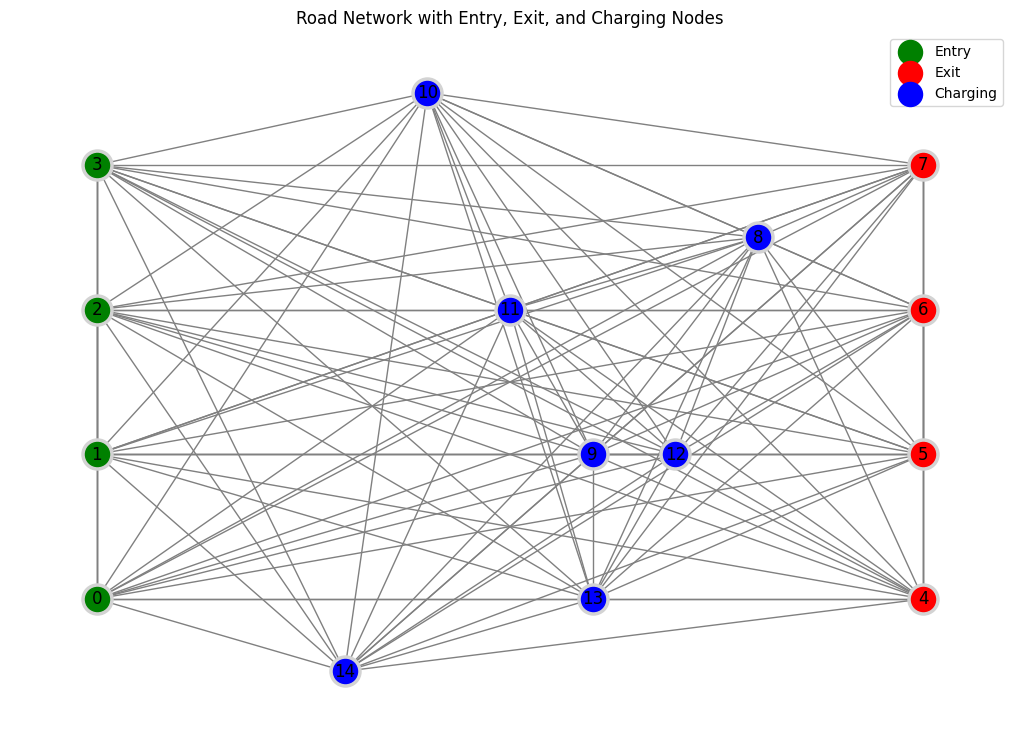

In [32]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

# Load the data
nodes_df = pd.read_csv('graph_nodes.csv')
edges_df = pd.read_csv('graph_edges.csv')
ev_df = pd.read_csv('EV_DATA_GENERATED.csv')

# Create the graph
G = nx.Graph()
for _, row in nodes_df.iterrows():
    G.add_node(int(row['node']), pos=(row['x'], row['y']))

for _, row in edges_df.iterrows():
    G.add_edge(int(row['from']), int(row['to']), weight=row['distance'])

# Define special nodes
entry_nodes = [0, 1, 2, 3]
exit_nodes = [4, 5, 6, 7]
charging_nodes = [8, 9, 10, 11, 12, 13, 14]

# Position mapping
pos = nx.get_node_attributes(G, 'pos')

# Plot the graph
plt.figure(figsize=(10, 7))
nx.draw(G, pos, with_labels=True, node_color='lightgray', node_size=500, edge_color='gray')
nx.draw_networkx_nodes(G, pos, nodelist=entry_nodes, node_color='green', label='Entry')
nx.draw_networkx_nodes(G, pos, nodelist=exit_nodes, node_color='red', label='Exit')
nx.draw_networkx_nodes(G, pos, nodelist=charging_nodes, node_color='blue', label='Charging')

plt.title("Road Network with Entry, Exit, and Charging Nodes")
plt.legend(scatterpoints=1)
plt.axis('off')
plt.show()

/var/folders/r2/c4l1bg9d0fnd5sq_sxy1vsg80000gn/T/ipykernel_4326/4050220628.py:42: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


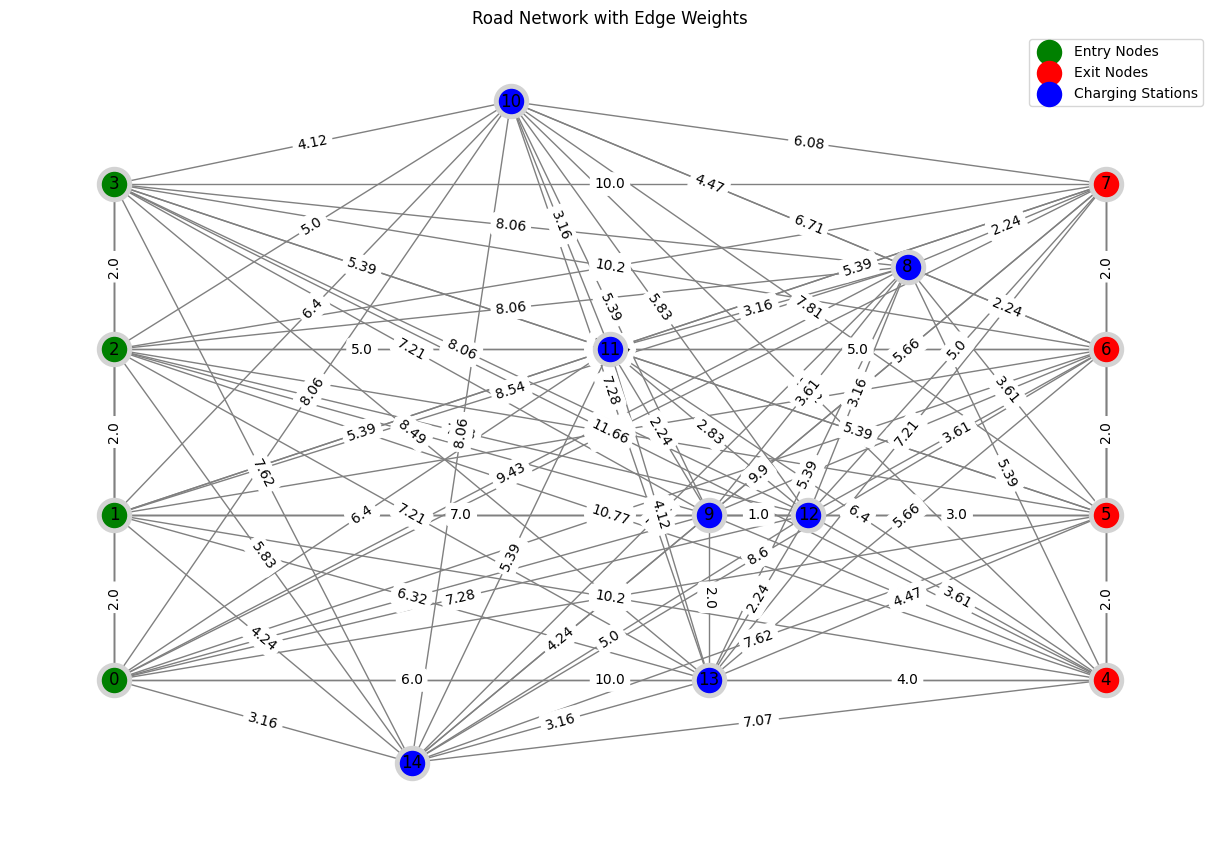

In [33]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

# Load data
nodes_df = pd.read_csv('graph_nodes.csv')
edges_df = pd.read_csv('graph_edges.csv')
ev_df = pd.read_csv('EV_DATA_GENERATED.csv')

# Create the graph
G = nx.Graph()
for _, row in nodes_df.iterrows():
    G.add_node(int(row['node']), pos=(row['x'], row['y']))

for _, row in edges_df.iterrows():
    G.add_edge(int(row['from']), int(row['to']), weight=row['distance'])

# Special nodes
entry_nodes = [0, 1, 2, 3]
exit_nodes = [4, 5, 6, 7]
charging_nodes = [8, 9, 10, 11, 12, 13, 14]

# Get node positions
pos = nx.get_node_attributes(G, 'pos')

# Draw base graph
plt.figure(figsize=(12, 8))
nx.draw(G, pos, with_labels=True, node_color='lightgray', node_size=600, edge_color='gray')

# Draw special node types
nx.draw_networkx_nodes(G, pos, nodelist=entry_nodes, node_color='green', label='Entry Nodes')
nx.draw_networkx_nodes(G, pos, nodelist=exit_nodes, node_color='red', label='Exit Nodes')
nx.draw_networkx_nodes(G, pos, nodelist=charging_nodes, node_color='blue', label='Charging Stations')

# Draw edge weights
edge_labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=10, label_pos=0.5)

plt.title("Road Network with Edge Weights")
plt.legend()
plt.axis('off')
plt.tight_layout()
plt.show()

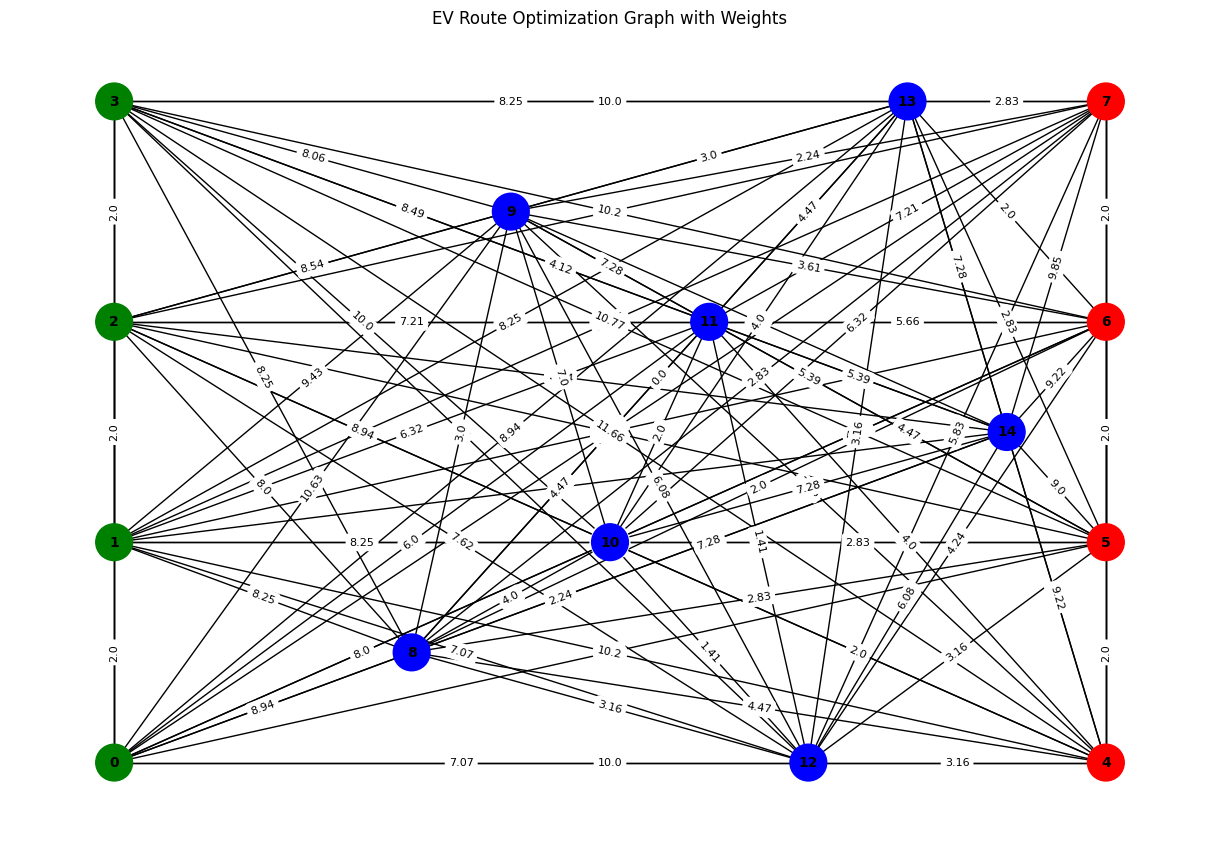

In [66]:
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt

# Load the node and edge data from CSV files
nodes_df = pd.read_csv("graph_nodes.csv")
edges_df = pd.read_csv("graph_edges.csv")

# Create a graph
G = nx.Graph()

# Modify the positions of the charging stations
new_charging_positions = {
    8: (5, 3),
    9: (6, 7),
    10: (7, 4),
    11: (8, 6),
    12: (9, 2),
    13: (10, 8),
    14: (11, 5),
}

# Add nodes with positions, using the new charging positions
node_positions = {}
for _, row in nodes_df.iterrows():
    if row["node"] in new_charging_positions:
        node_positions[row["node"]] = new_charging_positions[row["node"]]
    else:
        node_positions[row["node"]] = (row["x"], row["y"])

# Create graph nodes and edges
for _, row in nodes_df.iterrows():
    G.add_node(row["node"], pos=node_positions[row["node"]])

for _, row in edges_df.iterrows():
    G.add_edge(row["from"], row["to"], weight=row["distance"])

# Save node positions to graph_nodes.csv
nodes_to_save = pd.DataFrame([
    {"node": node, "x": pos[0], "y": pos[1]}
    for node, pos in node_positions.items()
])
nodes_to_save.to_csv("graph_nodes.csv", index=False)

# Save edge weights to graph_edges.csv
edges_to_save = pd.DataFrame([
    {"from": u, "to": v, "distance": d["weight"]}
    for u, v, d in G.edges(data=True)
])
edges_to_save.to_csv("graph_edges.csv", index=False)

# Plot the graph
plt.figure(figsize=(12, 8))

# Define node categories
entry_nodes = [0, 1, 2, 3]
exit_nodes = [4, 5, 6, 7]
charging_nodes = [8, 9, 10, 11, 12, 13, 14]

# Assign colors to nodes based on their category
entry_color = 'green'
exit_color = 'red'
charging_color = 'blue'

node_colors = [
    entry_color if node in entry_nodes else exit_color if node in exit_nodes else charging_color
    for node in G.nodes
]

# Draw the graph
nx.draw(G, node_positions, with_labels=True, node_size=700, node_color=node_colors, font_size=10, font_weight='bold')

# Draw the edge labels (weights)
edge_labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, node_positions, edge_labels=edge_labels, font_size=8)

# Title and labels
plt.title("EV Route Optimization Graph with Weights")
plt.xlabel("X Coordinate")
plt.ylabel("Y Coordinate")
plt.show()

In [70]:
import random
import pandas as pd
import networkx as nx

# Load graph
nodes_df = pd.read_csv("graph_nodes.csv")
edges_df = pd.read_csv("graph_edges.csv")

# Create graph
G = nx.Graph()
for _, row in nodes_df.iterrows():
    G.add_node(row['node'], pos=(row['x'], row['y']))
for _, row in edges_df.iterrows():
    G.add_edge(row['from'], row['to'], weight=row['distance'])

# Parameters
entry_points = [0, 1, 2, 3]
exit_points = [4, 5, 6, 7]
charging_stations = [8, 9, 10, 11, 12, 13, 14]
max_range = 20
efficiency = 1.0
population_size = 20
max_generations = 10

# Read EV dataset
ev_df = pd.read_csv("EV_DATA_GENERATED.csv")

def reset_schedule():
    return {station: [] for station in charging_stations}

schedule = reset_schedule()

def route_distance(path):
    return sum(G[path[i]][path[i+1]]['weight'] for i in range(len(path)-1))

def can_reach(path):
    return route_distance(path) * efficiency <= max_range

def generate_route(ev):
    entry = random.choice(entry_points)
    exit = random.choice(exit_points)
    path = [entry]

    while path[-1] != exit:
        neighbors = list(G.neighbors(path[-1]))
        random.shuffle(neighbors)
        for next_node in neighbors:
            if next_node not in path and (next_node in charging_stations or next_node == exit):
                path.append(next_node)
                break
        else:
            break

    reachable = path[-1] == exit and can_reach(path)
    return {'route': path, 'can_reach_exit': reachable}

def fitness(ind):
    return -route_distance(ind['route']) if ind['can_reach_exit'] else float('-inf')

def selection(population):
    sorted_pop = sorted(population, key=fitness, reverse=True)
    return sorted_pop[:len(population)//2]

def crossover(p1, p2):
    cut = min(len(p1['route']), len(p2['route'])) // 2
    merged = p1['route'][:cut] + [n for n in p2['route'][cut:] if n not in p1['route'][:cut]]
    return {'route': merged, 'can_reach_exit': can_reach(merged)}

def mutate(ind):
    if len(ind['route']) < 3:
        return ind
    idx = random.randint(1, len(ind['route']) - 2)
    neighbors = list(G.neighbors(ind['route'][idx - 1]))
    new = random.choice([n for n in neighbors if n != ind['route'][idx]])
    ind['route'][idx] = new
    ind['can_reach_exit'] = can_reach(ind['route'])
    return ind

results = []

for _, ev in ev_df.iterrows():
    print(f"\nOptimizing route for EV {ev['EV_ID']}")
    population = [generate_route(ev) for _ in range(population_size)]

    for gen in range(max_generations):
        mating_pool = selection(population)
        offspring = []
        while len(offspring) < population_size:
            p1, p2 = random.sample(mating_pool, 2)
            c = crossover(p1, p2)
            offspring.append(mutate(c))
        population = offspring

    best = max(population, key=fitness)
    for station in best['route']:
        if station in schedule and ev['EV_ID'] not in schedule[station] and len(schedule[station]) < 1:
            schedule[station].append(ev['EV_ID'])

    print(f"  Best Route: {best['route']} | Distance: {route_distance(best['route']):.2f} | Reachable: {best['can_reach_exit']}")
    results.append({
        "ev_id": ev['EV_ID'],
        "route": best['route'],
        "can_reach_exit": best['can_reach_exit'],
        "distance": route_distance(best['route'])
    })

# Save results
results_df = pd.DataFrame(results)
results_df.to_csv("optimized_ev_routes.csv", index=False)
print("\nSaved optimized routes to optimized_ev_routes.csv")


Optimizing route for EV 0
  Best Route: [1, 5.0] | Distance: 10.00 | Reachable: True

Optimizing route for EV 1


KeyError: 6.0

In [71]:
import pandas as pd
import numpy as np

# Define node categories
entry_nodes = [0, 1, 2, 3]
exit_nodes = [4, 5, 6, 7]
charging_nodes = [8, 9, 10, 11, 12, 13, 14]

# Initialize edge list
new_edges = []

# Rule 1: Entry nodes ONLY connect to charging nodes (no other connections)
for entry in entry_nodes:
    for charger in charging_nodes:
        distance = np.random.uniform(4, 10)
        new_edges.append({'from': entry, 'to': charger, 'distance': distance})

# Rule 2: Charging nodes connect to ALL exit nodes
for charger in charging_nodes:
    for exit in exit_nodes:
        distance = np.random.uniform(4, 10)
        new_edges.append({'from': charger, 'to': exit, 'distance': distance})

# Rule 3: ALL charging nodes are interconnected (fully connected)
for i, charger1 in enumerate(charging_nodes):
    for charger2 in charging_nodes[i+1:]:  # Avoid duplicates and self-loops
        distance = np.random.uniform(4, 10)
        new_edges.append({'from': charger1, 'to': charger2, 'distance': distance})

# Create DataFrame and save
edges_df = pd.DataFrame(new_edges)
edges_df.to_csv('restructured_edges_fully_connected_chargers.csv', index=False)

# Verify connections
print(f"Total edges: {len(edges_df)}")
print(f"Entry→Charger edges: {len(entry_nodes) * len(charging_nodes)}")
print(f"Charger→Exit edges: {len(charging_nodes) * len(exit_nodes)}")
print(f"Charger↔Charger edges: {len(charging_nodes) * (len(charging_nodes)-1)//2}")

Total edges: 77
Entry→Charger edges: 28
Charger→Exit edges: 28
Charger↔Charger edges: 21


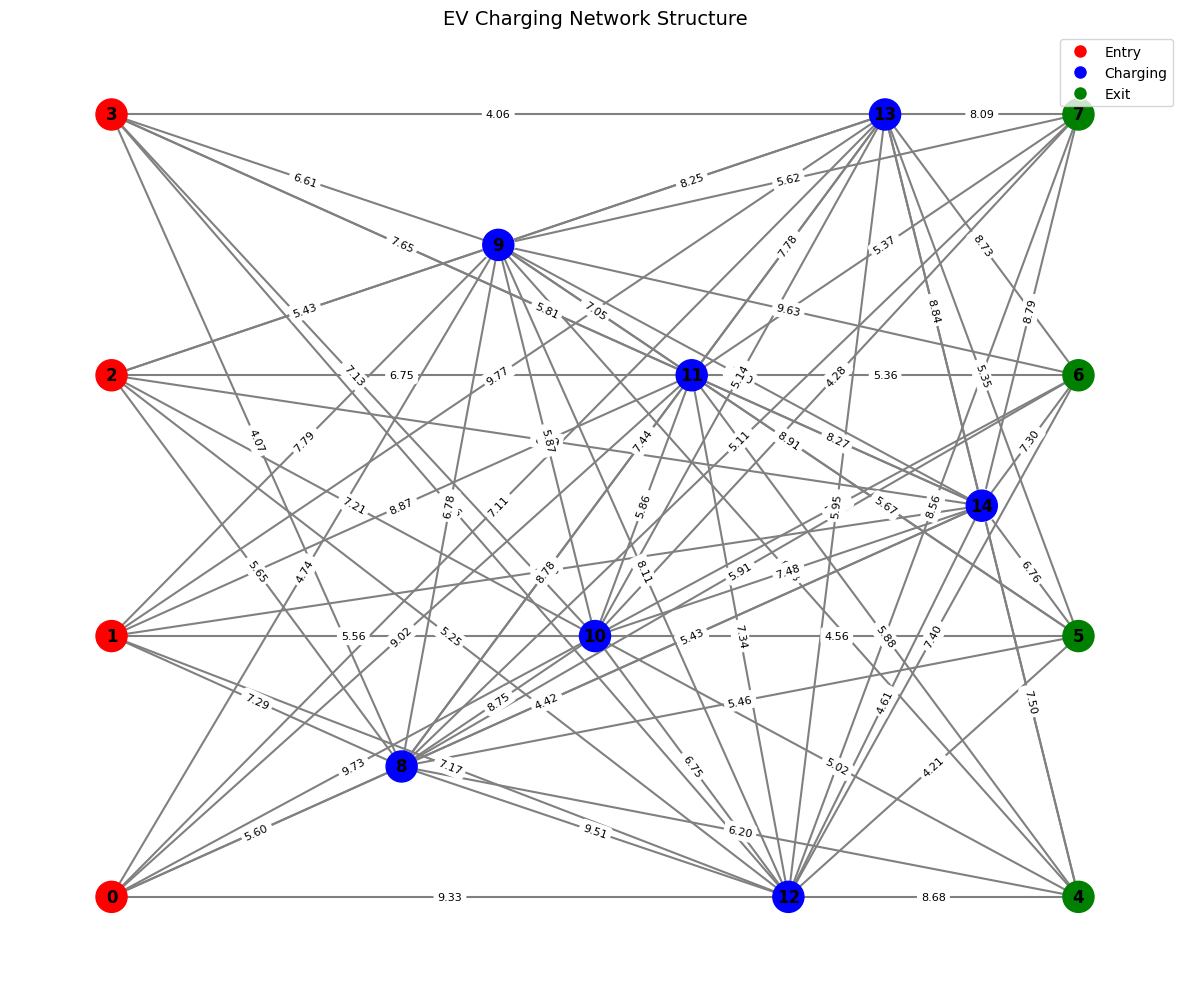

In [73]:
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd

# Load data
edges_df = pd.read_csv('restructured_edges_fully_connected_chargers.csv')
nodes_df = pd.read_csv('graph_nodes.csv')

# Create graph
G = nx.Graph()

# Add nodes with positions and colors
node_colors = []
for _, row in nodes_df.iterrows():
    node = row['node']
    if node in entry_nodes:
        node_colors.append('red')
    elif node in exit_nodes:
        node_colors.append('green')
    else:
        node_colors.append('blue')
    G.add_node(node, pos=(row['x'], row['y']))

# Add edges with rounded weights
for _, row in edges_df.iterrows():
    G.add_edge(row['from'], row['to'], weight=round(row['distance'], 2))

# Get positions and edge weights
pos = nx.get_node_attributes(G, 'pos')
edge_labels = nx.get_edge_attributes(G, 'weight')

# Draw the graph
plt.figure(figsize=(12, 10))

# Draw nodes
nx.draw_networkx_nodes(G, pos, node_size=500, node_color=node_colors)

# Draw edges
nx.draw_networkx_edges(G, pos, width=1.5, edge_color='gray')

# Draw labels with 2 decimal precision
nx.draw_networkx_labels(G, pos, font_size=12, font_weight='bold')
nx.draw_networkx_edge_labels(G, pos, 
                           edge_labels={k: f"{v:.2f}" for k,v in edge_labels.items()},
                           font_size=8)

# Add legend
legend_elements = [
    plt.Line2D([0], [0], marker='o', color='w', label='Entry', markerfacecolor='red', markersize=10),
    plt.Line2D([0], [0], marker='o', color='w', label='Charging', markerfacecolor='blue', markersize=10),
    plt.Line2D([0], [0], marker='o', color='w', label='Exit', markerfacecolor='green', markersize=10)
]
plt.legend(handles=legend_elements, loc='upper right')

plt.title("EV Charging Network Structure", fontsize=14)
plt.axis('off')
plt.tight_layout()
plt.show()

In [79]:
import numpy as np
import pandas as pd

# Configuration
MAX_RANGE = 25
MIN_RANGE = 8
MAX_RANGE_TARGET = 10
OUTPUT_FILE = "EV_efficiencies_25km_max.csv"

# Set seed for reproducibility
np.random.seed(42)

# Generate synthetic initial charges (replace with your actual data if needed)
initial_charges = np.round(np.random.uniform(0.25, 0.99, 50), 2)
ev_data = pd.DataFrame({
    'EV_ID': range(50),
    'Initial_Charge': initial_charges
})

# Calculate required efficiencies
ev_data['Target_Range'] = np.round(np.random.uniform(MIN_RANGE, MAX_RANGE_TARGET, 50), 2)
ev_data['Efficiency'] = np.round(ev_data['Target_Range'] / (ev_data['Initial_Charge'] * MAX_RANGE), 4)

# Apply realistic efficiency bounds (0.5-1.0)
ev_data['Efficiency'] = ev_data['Efficiency'].clip(0.5, 1.0)

# Calculate actual range
ev_data['Actual_Range'] = np.round(ev_data['Initial_Charge'] * ev_data['Efficiency'] * MAX_RANGE, 2)



# Save to CSV
ev_data.to_csv(OUTPUT_FILE, index=False)

print(f"Data saved to {OUTPUT_FILE}")
print("\nFirst 5 rows:")
print(ev_data.head())

Data saved to EV_efficiencies_25km_max.csv

First 5 rows:
   EV_ID  Initial_Charge  Target_Range  Efficiency  Actual_Range
0      0            0.53          9.94      0.7502          9.94
1      1            0.95          9.55      0.5000         11.88
2      2            0.79          9.88      0.5003          9.88
3      3            0.69          9.79      0.5675          9.79
4      4            0.37          9.20      0.9946          9.20


In [80]:
import pandas as pd
import numpy as np

# Configuration
CHARGING_NODES = [8, 9, 10, 11, 12, 13, 14]
MIN_CAPACITY = 0.35  # 35%
MAX_CAPACITY = 0.40   # 40%
OUTPUT_FILE = "charging_station_capacities.csv"

# Generate random capacities
np.random.seed(42)  # For reproducibility
capacities = np.round(np.random.uniform(MIN_CAPACITY, MAX_CAPACITY, len(CHARGING_NODES)), 3)

# Create DataFrame
charging_capacities = pd.DataFrame({
    'Node_ID': CHARGING_NODES,
    'Charging_Capacity': capacities,
    'Unit': ['charge_per_hour'] * len(CHARGING_NODES)  # Adjust unit if needed
})

# Save to CSV
charging_capacities.to_csv(OUTPUT_FILE, index=False)

print(f"Charging station capacities saved to {OUTPUT_FILE}")
print("\nGenerated Data:")
print(charging_capacities)

Charging station capacities saved to charging_station_capacities.csv

Generated Data:
   Node_ID  Charging_Capacity             Unit
0        8              0.369  charge_per_hour
1        9              0.398  charge_per_hour
2       10              0.387  charge_per_hour
3       11              0.380  charge_per_hour
4       12              0.358  charge_per_hour
5       13              0.358  charge_per_hour
6       14              0.353  charge_per_hour


In [87]:
import pandas as pd
import numpy as np

# Step 1: Load the CSV files
edges_df = pd.read_csv("restructured_edges_fully_connected_chargers.csv")
efficiencies_df = pd.read_csv("EV_efficiencies_25km_max.csv")
nodes_df = pd.read_csv("graph_nodes.csv")
capacities_df = pd.read_csv("charging_station_capacities.csv")

# Entry, exit, and charging node IDs
entry_nodes = [0, 1, 2, 3]
exit_nodes = [4, 5, 6, 7]
charging_nodes = [8, 9, 10, 11, 12, 13, 14]
max_range = 25

# Step 2: Assign 20 EVs to entry nodes (round-robin)
ev_assignments = [{"EV_ID": i, "Entry_Node": entry_nodes[i % len(entry_nodes)]} for i in range(20)]
ev_df = pd.DataFrame(ev_assignments)

# Merge with efficiencies and calculate initial range
ev_df = ev_df.merge(efficiencies_df, on="EV_ID")
ev_df["Initial_Range"] = ev_df["Efficiency"] * ev_df["Initial_Charge"] * max_range

# Step 3: Identify reachable charging stations
entry_to_charging = edges_df[
    edges_df['from'].isin(entry_nodes) & edges_df['to'].isin(charging_nodes)
]
entry_to_charging["distance"] = entry_to_charging["distance"].round(2)

ev_possible_stations = []
for _, ev in ev_df.iterrows():
    reachable_stations = entry_to_charging[
        (entry_to_charging["from"] == ev["Entry_Node"]) &
        (entry_to_charging["distance"] <= ev["Initial_Range"])
    ]["to"].tolist()

    ev_possible_stations.append({
        "EV_ID": ev["EV_ID"],
        "Entry_Node": ev["Entry_Node"],
        "Initial_Range": ev["Initial_Range"],
        "Possible_Charging_Stations": reachable_stations
    })

possible_stations_df = pd.DataFrame(ev_possible_stations)

# Step 4: Calculate range after recharge and check reachable exits
charging_to_exit = edges_df[
    edges_df['from'].isin(charging_nodes) & edges_df['to'].isin(exit_nodes)
]
charging_to_exit["distance"] = charging_to_exit["distance"].round(2)

entry_to_charging = entry_to_charging.copy()
entry_to_charging["distance"] = entry_to_charging["distance"].round(2)

charging_to_exit = charging_to_exit.copy()
charging_to_exit["distance"] = charging_to_exit["distance"].round(2)

capacities_df = capacities_df[["Node_ID", "Charging_Capacity"]]
capacities_df = capacities_df.rename(columns={"Node_ID": "Charging_Station", "Charging_Capacity": "Capacity"})
capacities_df["Capacity"] = capacities_df["Capacity"].astype(float)

station_range = pd.merge(
    possible_stations_df.explode("Possible_Charging_Stations"),
    capacities_df,
    left_on="Possible_Charging_Stations",
    right_on="Charging_Station",
    how="left"
)

station_range["New_Range"] = station_range["Capacity"] * max_range

ev_final_routes = []
for _, row in station_range.iterrows():
    exits_reachable = charging_to_exit[
        (charging_to_exit["from"] == row["Possible_Charging_Stations"]) &
        (charging_to_exit["distance"] <= row["New_Range"])
    ]["to"].tolist()

    ev_final_routes.append({
        "EV_ID": row["EV_ID"],
        "Entry_Node": row["Entry_Node"],
        "Initial_Range": row["Initial_Range"],
        "Charging_Station": row["Possible_Charging_Stations"],
        "Recharge_Capacity": row["Capacity"],
        "New_Range": row["New_Range"],
        "Possible_Exits": exits_reachable
    })

final_df = pd.DataFrame(ev_final_routes)

# Step 5: Enforce max 3 EVs per charging station based on shortest entry-to-station distance
entry_to_station_dist = edges_df[
    edges_df["from"].isin(entry_nodes) & edges_df["to"].isin(charging_nodes)
][["from", "to", "distance"]].rename(columns={"from": "Entry_Node", "to": "Charging_Station", "distance": "Entry_to_Station_Dist"})

final_df = pd.merge(final_df, entry_to_station_dist, on=["Entry_Node", "Charging_Station"], how="left")
final_df["Entry_to_Station_Dist"] = final_df["Entry_to_Station_Dist"].round(2)

final_df_sorted = final_df.sort_values(by=["Charging_Station", "Entry_to_Station_Dist", "EV_ID"])
final_df_sorted["Station_Ev_Count"] = final_df_sorted.groupby("Charging_Station").cumcount() + 1

allowed_ev_df = final_df_sorted[final_df_sorted["Station_Ev_Count"] <= 3]
denied_ev_df = final_df_sorted[final_df_sorted["Station_Ev_Count"] > 3]

# Output
print("Allowed EVs to charging stations (max 3 per station):")
print(allowed_ev_df[["EV_ID", "Entry_Node", "Charging_Station", "Entry_to_Station_Dist", "Possible_Exits"]].head(10))

print("\nDenied EVs due to full charging stations:")
print(denied_ev_df[["EV_ID", "Entry_Node", "Charging_Station", "Entry_to_Station_Dist"]].head(20))

Allowed EVs to charging stations (max 3 per station):
    EV_ID  Entry_Node  Charging_Station  Entry_to_Station_Dist Possible_Exits
21    3.0         3.0                 8                   4.07   [4, 5, 6, 7]
45    7.0         3.0                 8                   4.07   [4, 5, 6, 7]
66   11.0         3.0                 8                   4.07   [4, 5, 6, 7]
1     0.0         0.0                 9                   4.74   [4, 5, 6, 7]
29    4.0         0.0                 9                   4.74   [4, 5, 6, 7]
53    8.0         0.0                 9                   4.74   [4, 5, 6, 7]
9     1.0         1.0                10                   5.56   [4, 5, 6, 7]
35    5.0         1.0                10                   5.56   [4, 5, 6, 7]
58    9.0         1.0                10                   5.56   [4, 5, 6, 7]
17    2.0         2.0                11                   6.75   [4, 5, 6, 7]

Denied EVs due to full charging stations:
     EV_ID  Entry_Node  Charging_Station  Ent

/var/folders/r2/c4l1bg9d0fnd5sq_sxy1vsg80000gn/T/ipykernel_4326/844238459.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  entry_to_charging["distance"] = entry_to_charging["distance"].round(2)
/var/folders/r2/c4l1bg9d0fnd5sq_sxy1vsg80000gn/T/ipykernel_4326/844238459.py:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  charging_to_exit["distance"] = charging_to_exit["distance"].round(2)


In [88]:
import pandas as pd
import numpy as np
import random

# Load data
edges_df = pd.read_csv("restructured_edges_fully_connected_chargers.csv")
efficiencies_df = pd.read_csv("EV_efficiencies_25km_max.csv")
nodes_df = pd.read_csv("graph_nodes.csv")
capacities_df = pd.read_csv("charging_station_capacities.csv")

entry_nodes = [0, 1, 2, 3]
exit_nodes = [4, 5, 6, 7]
charging_nodes = [8, 9, 10, 11, 12, 13, 14]
max_range = 25
speed_kmph = 10

# Assign EVs to entry nodes
ev_assignments = [{"EV_ID": i, "Entry_Node": entry_nodes[i % len(entry_nodes)]} for i in range(20)]
ev_df = pd.DataFrame(ev_assignments)
ev_df = ev_df.merge(efficiencies_df, on="EV_ID")
ev_df["Initial_Range"] = ev_df["Efficiency"] * ev_df["Initial_Charge"] * max_range

# Clean edge distances\edges_df["distance"] = edges_df["distance"].round(2)

# Helper to get reachable neighbors within range
def get_reachable_neighbors(current_node, remaining_range):
    return edges_df[(edges_df['from'] == current_node) & (edges_df['distance'] <= remaining_range)][['to', 'distance']].values.tolist()

# Recursive DFS search for all paths to exit
all_routes = []

def dfs(ev_id, path, total_time, remaining_range, visited, current_node):
    if current_node in exit_nodes:
        all_routes.append({"EV_ID": ev_id, "Path": path.copy(), "Total_Time_Minutes": total_time})
        return

    neighbors = get_reachable_neighbors(current_node, remaining_range)
    random.shuffle(neighbors)

    for neighbor, distance in neighbors:
        if neighbor in visited:
            continue

        if neighbor in exit_nodes:
            time_cost = (distance / speed_kmph) * 60
            dfs(ev_id, path + [neighbor], total_time + time_cost, 0, visited | {neighbor}, neighbor)

        elif neighbor in charging_nodes:
            cap = capacities_df[capacities_df["Node_ID"] == neighbor]["Charging_Capacity"].values
            if len(cap) == 0:
                continue
            cap_val = cap[0]
            new_range = cap_val * max_range
            time_cost = (distance / speed_kmph) * 60 + 30
            dfs(ev_id, path + [neighbor], total_time + time_cost, new_range, visited | {neighbor}, neighbor)

# Run DFS for each EV
for _, ev in ev_df.iterrows():
    start_node = ev["Entry_Node"]
    initial_range = ev["Initial_Range"]
    dfs(ev_id=ev["EV_ID"], path=[start_node], total_time=0, remaining_range=initial_range, visited={start_node}, current_node=start_node)

# Choose best route per EV
all_routes_df = pd.DataFrame(all_routes)
best_routes_df = all_routes_df.sort_values("Total_Time_Minutes").groupby("EV_ID").first().reset_index()

# Output best paths
print("Optimized EV Routes (Best Time Path):")
print(best_routes_df)

# Save if needed
# best_routes_df.to_csv("optimized_ev_routes.csv", index=False)


Optimized EV Routes (Best Time Path):
    EV_ID              Path  Total_Time_Minutes
0     0.0   [0.0, 9.0, 7.0]           92.165026
1     1.0  [1.0, 10.0, 7.0]           89.059600
2     2.0  [2.0, 12.0, 5.0]           86.765345
3     3.0   [3.0, 8.0, 7.0]           85.072427
4     4.0   [0.0, 9.0, 7.0]           92.165026
5     5.0  [1.0, 10.0, 7.0]           89.059600
6     6.0  [2.0, 12.0, 5.0]           86.765345
7     7.0   [3.0, 8.0, 7.0]           85.072427
8     8.0   [0.0, 9.0, 7.0]           92.165026
9     9.0  [1.0, 10.0, 7.0]           89.059600
10   10.0  [2.0, 12.0, 5.0]           86.765345
11   11.0   [3.0, 8.0, 7.0]           85.072427
12   12.0   [0.0, 9.0, 7.0]           92.165026
13   13.0  [1.0, 10.0, 7.0]           89.059600
14   14.0  [2.0, 12.0, 5.0]           86.765345
15   15.0   [3.0, 8.0, 7.0]           85.072427
16   16.0   [0.0, 9.0, 7.0]           92.165026
17   17.0  [1.0, 10.0, 7.0]           89.059600
18   18.0  [2.0, 12.0, 5.0]           86.765345
19

In [94]:
import pandas as pd

# Load data
edges_df = pd.read_csv("restructured_edges_fully_connected_chargers.csv")
efficiencies_df = pd.read_csv("EV_efficiencies_25km_max.csv")
nodes_df = pd.read_csv("graph_nodes.csv")
capacities_df = pd.read_csv("charging_station_capacities.csv")

# Preprocess capacities: drop 'Unit' and rename columns
capacities_df = capacities_df.drop(columns=["Unit"])
capacities_df.columns = ["Charging_Station", "Capacity"]
capacities_df["Capacity"] = capacities_df["Capacity"].astype(float)

# Constants
entry_nodes = [0, 1, 2, 3]
exit_nodes = [4, 5, 6, 7]
charging_nodes = [8, 9, 10, 11, 12, 13, 14]
MAX_RANGE = 25  # max km range per full charge

# Assign entry nodes to EVs in round-robin
ev_entry_map = {}
for i, ev_id in enumerate(efficiencies_df["EV_ID"]):
    ev_entry_map[ev_id] = entry_nodes[i % len(entry_nodes)]

# Convert capacities to dict for fast lookup
station_capacity_dict = dict(zip(capacities_df["Charging_Station"], capacities_df["Capacity"]))

# Filter edges for relevant parts
entry_to_charging = edges_df[edges_df["from"].isin(entry_nodes) & edges_df["to"].isin(charging_nodes)]
charging_to_exit = edges_df[edges_df["from"].isin(charging_nodes) & edges_df["to"].isin(exit_nodes)]

routes = []

for i in range(min(20, len(efficiencies_df))):  # first 20 EVs
    ev = efficiencies_df.iloc[i]
    ev_id = ev["EV_ID"]
    entry_node = ev_entry_map[ev_id]
    initial_charge = ev["Initial_Charge"]
    efficiency = ev["Efficiency"]

    max_initial_range = efficiency * initial_charge * MAX_RANGE

    # Find reachable charging stations from entry node
    reachable_chargers = entry_to_charging[entry_to_charging["from"] == entry_node]

    for _, charger_row in reachable_chargers.iterrows():
        cs = charger_row["to"]
        dist_to_cs = charger_row["distance"]

        if dist_to_cs > max_initial_range:
            continue  # Can't reach charging station

        # Calculate new range after charging at station
        added_range = station_capacity_dict.get(cs, 0) * MAX_RANGE
        range_after_charge = max_initial_range - dist_to_cs + added_range

        # Check exits reachable from this charging station
        reachable_exits = charging_to_exit[charging_to_exit["from"] == cs]
        for _, exit_row in reachable_exits.iterrows():
            exit_node = exit_row["to"]
            dist_to_exit = exit_row["distance"]

            if dist_to_exit <= range_after_charge:
                routes.append((ev_id, entry_node, cs, exit_node))

# Save routes to CSV
routes_df = pd.DataFrame(routes, columns=["EV_ID", "Entry_Node", "Charging_Station", "Exit_Node"])
routes_df.to_csv("ev_possible_routes.csv", index=False)

print(f"Total routes generated: {len(routes_df)}")

Total routes generated: 484


In [104]:
import pandas as pd
import numpy as np
import random

# Load route and edge data
routes_df = pd.read_csv("ev_possible_routes.csv")
edges_df = pd.read_csv("restructured_edges_fully_connected_chargers.csv")

# Create distance lookup
distance_lookup = {(row['from'], row['to']): row['distance'] for _, row in edges_df.iterrows()}
distance_lookup.update({(row['to'], row['from']): row['distance'] for _, row in edges_df.iterrows()})

# Function to calculate route time
def route_time(entry, charger, exit_):
    d1 = distance_lookup.get((entry, charger), np.inf)
    d2 = distance_lookup.get((charger, exit_), np.inf)
    if np.isinf(d1) or np.isinf(d2):
        return np.inf
    return (d1 + d2) * 6 + 30

# Add time column
routes_df['time'] = routes_df.apply(
    lambda r: route_time(r.Entry_Node, r.Charging_Station, r.Exit_Node), axis=1
)
routes_df = routes_df[routes_df['time'] != np.inf]

# Memetic Algorithm Setup
NUM_EV = 20
EPOCHS = 10
POP_SIZE = 20

ev_ids = routes_df['EV_ID'].unique()[:NUM_EV]

def initial_population(ev_id):
    ev_routes = routes_df[routes_df['EV_ID'] == ev_id]
    replace = len(ev_routes) < POP_SIZE
    return ev_routes.sample(POP_SIZE, replace=replace).to_dict(orient='records')

def fitness(route):
    return route['time']

def mutate(route):
    options = routes_df[routes_df['EV_ID'] == route['EV_ID']]
    return options.sample(1).to_dict(orient='records')[0]

def crossover(parent1, parent2):
    return parent1 if parent1['time'] < parent2['time'] else parent2

best_routes = {}

for ev_id in ev_ids:
    population = initial_population(ev_id)
    for _ in range(EPOCHS):
        population.sort(key=fitness)
        top_half = population[:POP_SIZE//2]
        children = []
        for _ in range(POP_SIZE - len(top_half)):
            p1, p2 = random.sample(top_half, 2)
            child = crossover(p1, p2)
            if random.random() < 0.3:
                child = mutate(child)
            children.append(child)
        population = top_half + children
    best_routes[ev_id] = min(population, key=fitness)

# Output
best_routes_df = pd.DataFrame(best_routes.values())
best_routes_df = best_routes_df[['EV_ID', 'Entry_Node', 'Charging_Station', 'Exit_Node', 'time']]
print(best_routes_df)
best_routes_df.to_csv("best_routes_20evs_10epochs.csv", index=False)

    EV_ID  Entry_Node  Charging_Station  Exit_Node       time
0     0.0           0               9.0        7.0  92.165026
1     1.0           1              10.0        7.0  89.059600
2     2.0           2              12.0        5.0  86.765345
3     3.0           3               8.0        7.0  85.072427
4     4.0           0               9.0        7.0  92.165026
5     5.0           1              10.0        7.0  89.059600
6     6.0           2              12.0        5.0  86.765345
7     7.0           3               8.0        7.0  85.072427
8     8.0           0               9.0        7.0  92.165026
9     9.0           1              10.0        7.0  89.059600
10   10.0           2               8.0        7.0  94.547940
11   11.0           3               8.0        7.0  85.072427
12   12.0           0               9.0        7.0  92.165026
13   13.0           1              10.0        7.0  89.059600
14   14.0           2              12.0        5.0  86.765345
15   15.

In [105]:
print(routes_df['EV_ID'].value_counts().sort_index())

EV_ID
0.0     28
1.0     28
2.0     28
3.0     28
4.0     20
5.0     24
6.0     24
7.0     28
8.0     16
9.0     24
10.0    16
11.0    28
12.0    28
13.0    20
14.0    24
15.0    28
16.0    16
17.0    24
18.0    24
19.0    28
Name: count, dtype: int64


In [107]:
#for 50 EVS now :

import pandas as pd

# Load data
edges_df = pd.read_csv("restructured_edges_fully_connected_chargers.csv")
efficiencies_df = pd.read_csv("EV_efficiencies_25km_max.csv")
nodes_df = pd.read_csv("graph_nodes.csv")
capacities_df = pd.read_csv("charging_station_capacities.csv")

# Preprocess capacities
capacities_df = capacities_df.drop(columns=["Unit"])
capacities_df.columns = ["Charging_Station", "Capacity"]
capacities_df["Capacity"] = capacities_df["Capacity"].astype(float)

# Constants
entry_nodes = [0, 1, 2, 3]
exit_nodes = [4, 5, 6, 7]
charging_nodes = [8, 9, 10, 11, 12, 13, 14]
MAX_RANGE = 25

# Assign entry nodes to EVs in round-robin
ev_entry_map = {}
for i, ev_id in enumerate(efficiencies_df["EV_ID"]):
    ev_entry_map[ev_id] = entry_nodes[i % len(entry_nodes)]

# Convert capacities to dict
station_capacity_dict = dict(zip(capacities_df["Charging_Station"], capacities_df["Capacity"]))

# Filter edges
entry_to_charging = edges_df[edges_df["from"].isin(entry_nodes) & edges_df["to"].isin(charging_nodes)]
charging_to_exit = edges_df[edges_df["from"].isin(charging_nodes) & edges_df["to"].isin(exit_nodes)]

routes = []

for i in range(len(efficiencies_df)):  # All EVs
    ev = efficiencies_df.iloc[i]
    ev_id = ev["EV_ID"]
    entry_node = ev_entry_map[ev_id]
    initial_charge = ev["Initial_Charge"]
    efficiency = ev["Efficiency"]

    max_initial_range = efficiency * initial_charge * MAX_RANGE

    # Reachable charging stations
    reachable_chargers = entry_to_charging[entry_to_charging["from"] == entry_node]

    for _, charger_row in reachable_chargers.iterrows():
        cs = charger_row["to"]
        dist_to_cs = charger_row["distance"]

        if dist_to_cs > max_initial_range:
            continue

        # Charging gain
        added_range = station_capacity_dict.get(cs, 0) * MAX_RANGE
        range_after_charge = max_initial_range - dist_to_cs + added_range

        # Reachable exits
        reachable_exits = charging_to_exit[charging_to_exit["from"] == cs]
        for _, exit_row in reachable_exits.iterrows():
            exit_node = exit_row["to"]
            dist_to_exit = exit_row["distance"]

            if dist_to_exit <= range_after_charge:
                routes.append((ev_id, entry_node, cs, exit_node))

# Save routes
routes_df = pd.DataFrame(routes, columns=["EV_ID", "Entry_Node", "Charging_Station", "Exit_Node"])
routes_df.to_csv("ev_possible_routes.csv", index=False)

print(f"Total routes generated: {len(routes_df)}")

Total routes generated: 1188


In [108]:
#best routes for 50 EVs 
import pandas as pd
import numpy as np
import random

# Load route and edge data
routes_df = pd.read_csv("ev_possible_routes.csv")
edges_df = pd.read_csv("restructured_edges_fully_connected_chargers.csv")

# Create distance lookup
distance_lookup = {(row['from'], row['to']): row['distance'] for _, row in edges_df.iterrows()}
distance_lookup.update({(row['to'], row['from']): row['distance'] for _, row in edges_df.iterrows()})

# Function to calculate route time
def route_time(entry, charger, exit_):
    d1 = distance_lookup.get((entry, charger), np.inf)
    d2 = distance_lookup.get((charger, exit_), np.inf)
    if np.isinf(d1) or np.isinf(d2):
        return np.inf
    return (d1 + d2) * 6 + 30

# Add time column
routes_df['time'] = routes_df.apply(
    lambda r: route_time(r.Entry_Node, r.Charging_Station, r.Exit_Node), axis=1
)
routes_df = routes_df[routes_df['time'] != np.inf]

# Memetic Algorithm Setup
NUM_EV = 50
EPOCHS = 10
POP_SIZE = 20

ev_ids = routes_df['EV_ID'].unique()[:NUM_EV]

def initial_population(ev_id):
    ev_routes = routes_df[routes_df['EV_ID'] == ev_id]
    replace = len(ev_routes) < POP_SIZE
    return ev_routes.sample(POP_SIZE, replace=replace).to_dict(orient='records')

def fitness(route):
    return route['time']

def mutate(route):
    options = routes_df[routes_df['EV_ID'] == route['EV_ID']]
    return options.sample(1).to_dict(orient='records')[0]

def crossover(parent1, parent2):
    return parent1 if parent1['time'] < parent2['time'] else parent2

best_routes = {}

for ev_id in ev_ids:
    population = initial_population(ev_id)
    for _ in range(EPOCHS):
        population.sort(key=fitness)
        top_half = population[:POP_SIZE//2]
        children = []
        for _ in range(POP_SIZE - len(top_half)):
            p1, p2 = random.sample(top_half, 2)
            child = crossover(p1, p2)
            if random.random() < 0.3:
                child = mutate(child)
            children.append(child)
        population = top_half + children
    best_routes[ev_id] = min(population, key=fitness)

# Output
best_routes_df = pd.DataFrame(best_routes.values())
best_routes_df = best_routes_df[['EV_ID', 'Entry_Node', 'Charging_Station', 'Exit_Node', 'time']]
print(best_routes_df)
best_routes_df.to_csv("best_routes_20evs_10epochs.csv", index=False)

    EV_ID  Entry_Node  Charging_Station  Exit_Node       time
0     0.0           0               9.0        7.0  92.165026
1     1.0           1              10.0        7.0  89.059600
2     2.0           2              12.0        5.0  86.765345
3     3.0           3              13.0        5.0  86.471359
4     4.0           0               9.0        7.0  92.165026
5     5.0           1              10.0        7.0  89.059600
6     6.0           2              12.0        5.0  86.765345
7     7.0           3               8.0        7.0  85.072427
8     8.0           0               9.0        7.0  92.165026
9     9.0           1              10.0        7.0  89.059600
10   10.0           2              12.0        5.0  86.765345
11   11.0           3               8.0        7.0  85.072427
12   12.0           0               9.0        7.0  92.165026
13   13.0           1              10.0        7.0  89.059600
14   14.0           2              12.0        5.0  86.765345
15   15.

In [109]:
import pandas as pd

# Define nodes
nodes = []

# Entry nodes at x=2
for i, y in enumerate([2, 4, 6, 8]):
    nodes.append((i, 2, y))

# Exit nodes at x=20
for i, y in enumerate([2, 4, 6, 8], start=4):
    nodes.append((i, 20, y))

# Charging nodes between x=5 and x=18
charging_coords = [
    (5, 2), (6, 4), (7, 6), (8, 3), (9, 5),
    (10, 7), (11, 2), (12, 4), (13, 6), (14, 3),
    (15, 5), (16, 7), (17, 2), (18, 4), (19, 6)
]
for i, (x, y) in enumerate(charging_coords, start=8):
    nodes.append((i, x, y))

# Create DataFrame and save to CSV
df = pd.DataFrame(nodes, columns=["node", "x", "y"])
df.to_csv("More_graph_nodes.csv", index=False)

print("More_graph_nodes.csv created successfully with 4 entry, 4 exit, and 15 charging nodes.")

More_graph_nodes.csv created successfully with 4 entry, 4 exit, and 15 charging nodes.


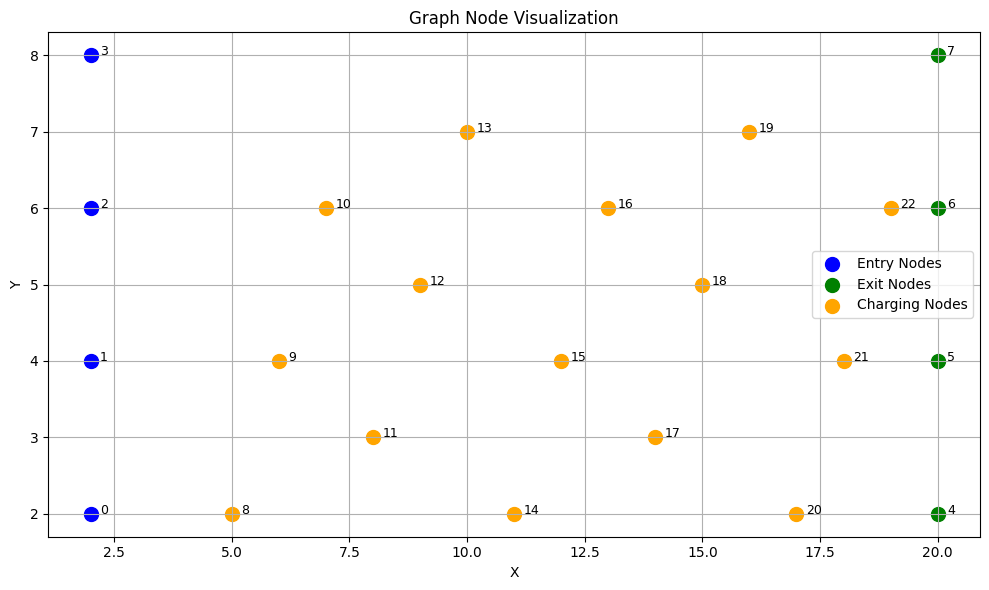

In [110]:
import pandas as pd
import matplotlib.pyplot as plt

# Load node data
df = pd.read_csv("More_graph_nodes.csv")

# Categorize nodes
entry_nodes = df[df['x'] == 2]
exit_nodes = df[df['x'] == 20]
charging_nodes = df[(df['x'] != 2) & (df['x'] != 20)]

# Plot
plt.figure(figsize=(10, 6))

plt.scatter(entry_nodes['x'], entry_nodes['y'], color='blue', label='Entry Nodes', s=100)
plt.scatter(exit_nodes['x'], exit_nodes['y'], color='green', label='Exit Nodes', s=100)
plt.scatter(charging_nodes['x'], charging_nodes['y'], color='orange', label='Charging Nodes', s=100)

# Annotate node numbers
for _, row in df.iterrows():
    plt.text(row['x'] + 0.2, row['y'], str(row['node']), fontsize=9)

plt.xlabel("X")
plt.ylabel("Y")
plt.title("Graph Node Visualization")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

In [126]:
import pandas as pd
import numpy as np

# Load node data
nodes_df = pd.read_csv("More_graph_nodes.csv")

# Identify node types
entry_nodes = nodes_df[nodes_df['x'] == 2]['node'].tolist()
exit_nodes = nodes_df[nodes_df['x'] == 20]['node'].tolist()
charging_nodes = nodes_df[(nodes_df['x'] != 2) & (nodes_df['x'] != 20)]['node'].tolist()

# Initialize edge list
edges = []

# Rule 1: Entry nodes → Charging nodes
for entry in entry_nodes:
    for charger in charging_nodes:
        distance = np.random.uniform(8, 10)
        edges.append({'from': entry, 'to': charger, 'distance': round(distance, 2)})

# Rule 2: Charging nodes → Exit nodes
for charger in charging_nodes:
    for exit_node in exit_nodes:
        distance = np.random.uniform(8, 10)
        edges.append({'from': charger, 'to': exit_node, 'distance': round(distance, 2)})

# Rule 3: Fully connect all charging nodes with each other
for i, c1 in enumerate(charging_nodes):
    for c2 in charging_nodes[i+1:]:
        distance = np.random.uniform(8, 10)
        edges.append({'from': c1, 'to': c2, 'distance': round(distance, 2)})

# Save to CSV
edges_df = pd.DataFrame(edges)
edges_df.to_csv("New_50EV_edges.csv", index=False)

# Output summary
print(f"Total edges: {len(edges_df)}")
print(f"Entry→Charger edges: {len(entry_nodes) * len(charging_nodes)}")
print(f"Charger→Exit edges: {len(charging_nodes) * len(exit_nodes)}")
print(f"Charger↔Charger edges: {len(charging_nodes) * (len(charging_nodes) - 1) // 2}")

Total edges: 225
Entry→Charger edges: 60
Charger→Exit edges: 60
Charger↔Charger edges: 105


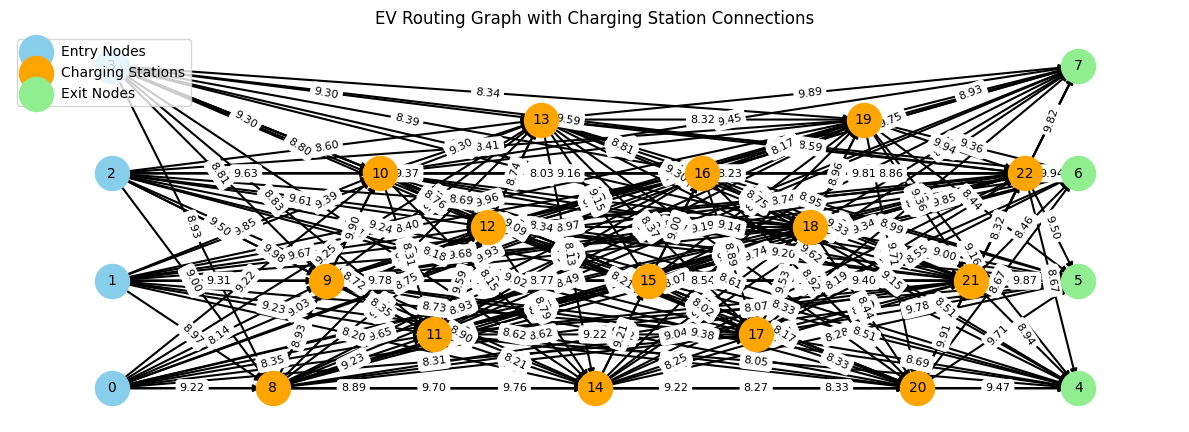

In [127]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

# Load node and edge data
nodes_df = pd.read_csv("More_graph_nodes.csv")
edges_df = pd.read_csv("restructured_edges_fully_connected_chargers.csv")

# Create directed graph
G = nx.DiGraph()

# Add nodes with positions
positions = {row['node']: (row['x'], row['y']) for _, row in nodes_df.iterrows()}
for node in positions:
    G.add_node(node)

# Add edges with weights
for _, row in edges_df.iterrows():
    G.add_edge(row['from'], row['to'], weight=row['distance'])

# Define node categories
entry_nodes = nodes_df[nodes_df['x'] == 2]['node'].tolist()
exit_nodes = nodes_df[nodes_df['x'] == 20]['node'].tolist()
charging_nodes = nodes_df[(nodes_df['x'] != 2) & (nodes_df['x'] != 20)]['node'].tolist()

# Draw nodes with categories
plt.figure(figsize=(12, 6))
nx.draw_networkx_nodes(G, positions, nodelist=entry_nodes, node_color='skyblue', node_size=600, label='Entry Nodes')
nx.draw_networkx_nodes(G, positions, nodelist=charging_nodes, node_color='orange', node_size=600, label='Charging Stations')
nx.draw_networkx_nodes(G, positions, nodelist=exit_nodes, node_color='lightgreen', node_size=600, label='Exit Nodes')

# Draw edges
nx.draw_networkx_edges(G, positions, arrowstyle='-|>', arrowsize=10, width=1.5)

# Draw node labels
nx.draw_networkx_labels(G, positions, font_size=10, font_color='black')

# Draw edge weight labels with 2 decimal places
edge_labels = {(u, v): f"{d['weight']:.2f}" for u, v, d in G.edges(data=True)}
nx.draw_networkx_edge_labels(G, positions, edge_labels=edge_labels, font_size=8)

# Maintain equal scaling
plt.gca().set_aspect('equal', adjustable='box')

# Plot settings
plt.title("EV Routing Graph with Charging Station Connections")
plt.axis('off')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

In [128]:
import pandas as pd
import numpy as np

# Charging station node IDs (15 total from 8 to 22 inclusive)
charging_stations = list(range(8, 23))

# Generate capacities between 0.35 and 0.4
capacities = np.round(np.random.uniform(0.35, 0.4, len(charging_stations)), 3)

# Create DataFrame
capacities_df = pd.DataFrame({
    "Node_ID": charging_stations,
    "Charging_Capacity": capacities,
    "Unit": ["charge_per_hour"] * len(charging_stations)
})

# Save to CSV
capacities_df.to_csv("charging_for_50EV.csv", index=False)
print("charging_for_50EV.csv updated with 15 stations (0.35–0.4 capacity range).\n")

# Show head(15)
print(capacities_df.head(15))

charging_for_50EV.csv updated with 15 stations (0.35–0.4 capacity range).

    Node_ID  Charging_Capacity             Unit
0         8              0.367  charge_per_hour
1         9              0.369  charge_per_hour
2        10              0.360  charge_per_hour
3        11              0.398  charge_per_hour
4        12              0.352  charge_per_hour
5        13              0.369  charge_per_hour
6        14              0.367  charge_per_hour
7        15              0.391  charge_per_hour
8        16              0.375  charge_per_hour
9        17              0.358  charge_per_hour
10       18              0.375  charge_per_hour
11       19              0.362  charge_per_hour
12       20              0.351  charge_per_hour
13       21              0.377  charge_per_hour
14       22              0.368  charge_per_hour


In [130]:
import pandas as pd

# Load data
edges_df = pd.read_csv("New_50EV_edges.csv")
efficiencies_df = pd.read_csv("EV_efficiencies_25km_max.csv")
nodes_df = pd.read_csv("More_graph_nodes.csv")
capacities_df = pd.read_csv("charging_for_50EV.csv")

# Preprocess capacities: drop 'Unit' and rename columns
capacities_df = capacities_df.drop(columns=["Unit"])
capacities_df.columns = ["Charging_Station", "Capacity"]
capacities_df["Capacity"] = capacities_df["Capacity"].astype(float)

# Constants
entry_nodes = [0, 1, 2, 3]
exit_nodes = [4, 5, 6, 7]
charging_nodes = [8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22]
MAX_RANGE = 25  # max km range per full charge

# Assign entry nodes to EVs in round-robin
ev_entry_map = {}
for i, ev_id in enumerate(efficiencies_df["EV_ID"]):
    ev_entry_map[ev_id] = entry_nodes[i % len(entry_nodes)]

# Convert capacities to dict for fast lookup
station_capacity_dict = dict(zip(capacities_df["Charging_Station"], capacities_df["Capacity"]))

# Filter edges for relevant parts
entry_to_charging = edges_df[edges_df["from"].isin(entry_nodes) & edges_df["to"].isin(charging_nodes)]
charging_to_exit = edges_df[edges_df["from"].isin(charging_nodes) & edges_df["to"].isin(exit_nodes)]

routes = []

for i in range(min(50, len(efficiencies_df))):  # first 50 EVs
    ev = efficiencies_df.iloc[i]
    ev_id = ev["EV_ID"]
    entry_node = ev_entry_map[ev_id]
    initial_charge = ev["Initial_Charge"]
    efficiency = ev["Efficiency"]

    max_initial_range = efficiency * initial_charge * MAX_RANGE

    # Find reachable charging stations from entry node
    reachable_chargers = entry_to_charging[entry_to_charging["from"] == entry_node]

    for _, charger_row in reachable_chargers.iterrows():
        cs = charger_row["to"]
        dist_to_cs = charger_row["distance"]

        if dist_to_cs > max_initial_range:
            continue  # Can't reach charging station

        # Calculate new range after charging at station
        added_range = station_capacity_dict.get(cs, 0) * MAX_RANGE
        range_after_charge = max_initial_range - dist_to_cs + added_range

        # Check exits reachable from this charging station
        reachable_exits = charging_to_exit[charging_to_exit["from"] == cs]
        for _, exit_row in reachable_exits.iterrows():
            exit_node = exit_row["to"]
            dist_to_exit = exit_row["distance"]

            if dist_to_exit <= range_after_charge:
                routes.append((ev_id, entry_node, cs, exit_node))

# Save routes to CSV
routes_df = pd.DataFrame(routes, columns=["EV_ID", "Entry_Node", "Charging_Station", "Exit_Node"])
routes_df.to_csv("ev_possibleroutes_for_50EV.csv", index=False)

print(f"Total routes generated: {len(routes_df)}")

Total routes generated: 1631


In [141]:
#best routes for 50 EVs no penalty.
import pandas as pd
import numpy as np
import random

# Load route and edge data
routes_df = pd.read_csv("ev_possibleroutes_for_50EV.csv")
edges_df = pd.read_csv("New_50EV_edges.csv")

# Create distance lookup
distance_lookup = {(row['from'], row['to']): row['distance'] for _, row in edges_df.iterrows()}
distance_lookup.update({(row['to'], row['from']): row['distance'] for _, row in edges_df.iterrows()})

# Function to calculate route time
def route_time(entry, charger, exit_):
    d1 = distance_lookup.get((entry, charger), np.inf)
    d2 = distance_lookup.get((charger, exit_), np.inf)
    if np.isinf(d1) or np.isinf(d2):
        return np.inf
    return (d1 + d2) * 6 + 30

# Add time column
routes_df['time'] = routes_df.apply(
    lambda r: route_time(r.Entry_Node, r.Charging_Station, r.Exit_Node), axis=1
)
routes_df = routes_df[routes_df['time'] != np.inf]

# Memetic Algorithm Setup
NUM_EV = 50
EPOCHS = 20
POP_SIZE = 10

ev_ids = routes_df['EV_ID'].unique()[:NUM_EV]

def initial_population(ev_id):
    ev_routes = routes_df[routes_df['EV_ID'] == ev_id]
    replace = len(ev_routes) < POP_SIZE
    return ev_routes.sample(POP_SIZE, replace=replace).to_dict(orient='records')

def fitness(route):
    return route['time']

def mutate(route):
    options = routes_df[routes_df['EV_ID'] == route['EV_ID']]
    return options.sample(1).to_dict(orient='records')[0]

def crossover(parent1, parent2):
    return parent1 if parent1['time'] < parent2['time'] else parent2

best_routes = {}

for ev_id in ev_ids:
    population = initial_population(ev_id)
    for _ in range(EPOCHS):
        population.sort(key=fitness)
        top_half = population[:POP_SIZE//2]
        children = []
        for _ in range(POP_SIZE - len(top_half)):
            p1, p2 = random.sample(top_half, 2)
            child = crossover(p1, p2)
            if random.random() < 0.3:
                child = mutate(child)
            children.append(child)
        population = top_half + children
    best_routes[ev_id] = min(population, key=fitness)

# Output
best_routes_df = pd.DataFrame(best_routes.values())
best_routes_df = best_routes_df[['EV_ID', 'Entry_Node', 'Charging_Station', 'Exit_Node', 'time']]
print(best_routes_df)
best_routes_df.to_csv("best_routes_50evs_20epochs.csv", index=False)

    EV_ID  Entry_Node  Charging_Station  Exit_Node    time
0     0.0           0              15.0        4.0  126.84
1     1.0           1              12.0        5.0  128.46
2     2.0           2              18.0        7.0  127.98
3     3.0           3              15.0        4.0  130.98
4     4.0           0              15.0        4.0  126.84
5     5.0           1              12.0        4.0  127.08
6     7.0           3              18.0        5.0  130.74
7     8.0           0              15.0        4.0  126.84
8     9.0           1              17.0        5.0  128.70
9    11.0           3              14.0        5.0  128.10
10   12.0           0              15.0        5.0  127.98
11   13.0           1              12.0        4.0  127.08
12   14.0           2              18.0        4.0  127.14
13   15.0           3              18.0        4.0  128.88
14   16.0           0              15.0        4.0  126.84
15   17.0           1              12.0        4.0  127.

In [142]:
# Count how many EVs are using each charging station
charger_counts = best_routes_df['Charging_Station'].value_counts().sort_index()

# Display the counts
print("\nNumber of EVs using each Charging Station:\n")
for charger, count in charger_counts.items():
    print(f"Charging Station {charger}: {count} EVs")


Number of EVs using each Charging Station:

Charging Station 12.0: 9 EVs
Charging Station 14.0: 5 EVs
Charging Station 15.0: 12 EVs
Charging Station 17.0: 2 EVs
Charging Station 18.0: 12 EVs
Charging Station 21.0: 2 EVs


In [139]:
#EV by EV memetic with penalty for 50 EVs .
import pandas as pd
import numpy as np
import random

# Load route and edge data
routes_df = pd.read_csv("ev_possibleroutes_for_50EV.csv")
edges_df = pd.read_csv("New_50EV_edges.csv")

# Create distance lookup
distance_lookup = {(row['from'], row['to']): row['distance'] for _, row in edges_df.iterrows()}
distance_lookup.update({(row['to'], row['from']): row['distance'] for _, row in edges_df.iterrows()})

# Function to calculate route time
def route_time(entry, charger, exit_):
    d1 = distance_lookup.get((entry, charger), np.inf)
    d2 = distance_lookup.get((charger, exit_), np.inf)
    if np.isinf(d1) or np.isinf(d2):
        return np.inf
    return (d1 + d2) * 6 + 30

# Add time column
routes_df['time'] = routes_df.apply(
    lambda r: route_time(r.Entry_Node, r.Charging_Station, r.Exit_Node), axis=1
)
routes_df = routes_df[routes_df['time'] != np.inf]

# Memetic Algorithm Setup
NUM_EV = 50
EPOCHS = 20
POP_SIZE = 10

ev_ids = routes_df['EV_ID'].unique()[:NUM_EV]

def initial_population(ev_id):
    ev_routes = routes_df[routes_df['EV_ID'] == ev_id]
    replace = len(ev_routes) < POP_SIZE
    return ev_routes.sample(POP_SIZE, replace=replace).to_dict(orient='records')

def fitness(route, congestion_counts):
    # Base travel time
    base_time = route['time']
    
    # Penalize if this charging station is overcrowded
    charger = route['Charging_Station']
    count = congestion_counts.get(charger, 0)
    
    # Add penalty: 5 minutes per extra EV after the first 3
    penalty = max(0, count - 3) * 5
    
    return base_time + penalty

def mutate(route):
    options = routes_df[routes_df['EV_ID'] == route['EV_ID']]
    return options.sample(1).to_dict(orient='records')[0]

def crossover(parent1, parent2):
    return parent1 if parent1['time'] < parent2['time'] else parent2

best_routes = {}

for ev_id in ev_ids:
    population = initial_population(ev_id)
    for _ in range(EPOCHS):
        congestion_counts = {}
        for route in population:
            cs = route['Charging_Station']
            congestion_counts[cs] = congestion_counts.get(cs, 0) + 1

        population.sort(key=lambda r: fitness(r, congestion_counts))
        top_half = population[:POP_SIZE//2]
        children = []

        for _ in range(POP_SIZE - len(top_half)):
            p1, p2 = random.sample(top_half, 2)
            child = crossover(p1, p2)
            if random.random() < 0.3:
                child = mutate(child)
            children.append(child)

        population = top_half + children

    # Final best route for this EV after all epochs
    congestion_counts = {}
    for route in population:
        cs = route['Charging_Station']
        congestion_counts[cs] = congestion_counts.get(cs, 0) + 1

    best_routes[ev_id] = min(population, key=lambda r: fitness(r, congestion_counts))

# Output
best_routes_df = pd.DataFrame(best_routes.values())
best_routes_df = best_routes_df[['EV_ID', 'Entry_Node', 'Charging_Station', 'Exit_Node', 'time']]
print(best_routes_df)
best_routes_df.to_csv("best_routes_50evs_20epochs.csv", index=False)




    EV_ID  Entry_Node  Charging_Station  Exit_Node    time
0     0.0           0              15.0        5.0  127.98
1     1.0           1              16.0        6.0  130.02
2     2.0           2              18.0        6.0  129.96
3     3.0           3              18.0        5.0  130.74
4     4.0           0              15.0        5.0  127.98
5     5.0           1              12.0        6.0  132.42
6     7.0           3              20.0        4.0  131.46
7     8.0           0              21.0        7.0  128.46
8     9.0           1              16.0        6.0  130.02
9    11.0           3              12.0        5.0  134.64
10   12.0           0              21.0        4.0  127.14
11   13.0           1              13.0        4.0  129.42
12   14.0           2              12.0        4.0  128.10
13   15.0           3              14.0        5.0  128.10
14   16.0           0              15.0        5.0  127.98
15   17.0           1              16.0        7.0  130.

In [140]:
# Count how many EVs go through each charging station
charger_counts = best_routes_df['Charging_Station'].value_counts().sort_index()

# Print results
print("Number of EVs using each Charging Station:\n")
for charger, count in charger_counts.items():
    print(f"Charging Station {charger}: {count} EVs")

Number of EVs using each Charging Station:

Charging Station 12.0: 6 EVs
Charging Station 13.0: 3 EVs
Charging Station 14.0: 2 EVs
Charging Station 15.0: 9 EVs
Charging Station 16.0: 4 EVs
Charging Station 17.0: 3 EVs
Charging Station 18.0: 6 EVs
Charging Station 19.0: 1 EVs
Charging Station 20.0: 4 EVs
Charging Station 21.0: 3 EVs
Charging Station 22.0: 1 EVs


In [137]:
#treating the whole 50 routes as a individal set and doing penalty memetic.
import pandas as pd
import numpy as np
import random

# Load data
routes_df = pd.read_csv("ev_possibleroutes_for_50EV.csv")
edges_df = pd.read_csv("New_50EV_edges.csv")

# Distance lookup
distance_lookup = {(row['from'], row['to']): row['distance'] for _, row in edges_df.iterrows()}
distance_lookup.update({(row['to'], row['from']): row['distance'] for _, row in edges_df.iterrows()})

# Calculate route time
def route_time(entry, charger, exit_):
    d1 = distance_lookup.get((entry, charger), np.inf)
    d2 = distance_lookup.get((charger, exit_), np.inf)
    if np.isinf(d1) or np.isinf(d2):
        return np.inf
    return (d1 + d2) * 6 + 30

# Add time to routes
routes_df['time'] = routes_df.apply(
    lambda r: route_time(r.Entry_Node, r.Charging_Station, r.Exit_Node), axis=1
)
routes_df = routes_df[routes_df['time'] != np.inf]

# Constants
NUM_EV = 50
EPOCHS = 20
POP_SIZE = 10
ev_ids = sorted(routes_df['EV_ID'].unique()[:NUM_EV])

# Create one individual (full 50 EV routes)
def initial_individual():
    individual = []
    for ev_id in ev_ids:
        options = routes_df[routes_df['EV_ID'] == ev_id]
        route = options.sample(1).iloc[0].to_dict()
        individual.append(route)
    return individual

# Full population of individuals
def initial_population(pop_size):
    return [initial_individual() for _ in range(pop_size)]

# Fitness with congestion penalty
def fitness_individual(individual):
    congestion_counts = {}
    for route in individual:
        cs = route['Charging_Station']
        congestion_counts[cs] = congestion_counts.get(cs, 0) + 1

    total_fitness = 0
    for route in individual:
        base_time = route['time']
        cs = route['Charging_Station']
        count = congestion_counts.get(cs, 0)
        penalty = max(0, count - 3) * 5
        total_fitness += base_time + penalty
    return total_fitness

# Crossover
def crossover_individual(parent1, parent2):
    return [p1 if random.random() < 0.5 else p2 for p1, p2 in zip(parent1, parent2)]

# Mutation
def mutate_individual(individual):
    new_individual = individual.copy()
    if len(new_individual) == 0:
        return new_individual
    idx = random.randint(0, len(new_individual) - 1)
    ev_id = new_individual[idx]['EV_ID']
    options = routes_df[routes_df['EV_ID'] == ev_id]
    if len(options) > 0:
        new_individual[idx] = options.sample(1).iloc[0].to_dict()
    return new_individual

# Run memetic algorithm
population = initial_population(POP_SIZE)

for _ in range(EPOCHS):
    population.sort(key=fitness_individual)
    top_half = population[:POP_SIZE // 2]
    children = []

    while len(children) < POP_SIZE - len(top_half):
        p1, p2 = random.sample(top_half, 2)
        child = crossover_individual(p1, p2)
        if random.random() < 0.3:
            child = mutate_individual(child)
        children.append(child)

    population = top_half + children

# Best result
best_individual = min(population, key=fitness_individual)
best_routes_df = pd.DataFrame(best_individual)
best_routes_df = best_routes_df[['EV_ID', 'Entry_Node', 'Charging_Station', 'Exit_Node', 'time']]
print(best_routes_df)
best_routes_df.to_csv("best_routes_50evs_20epochs.csv", index=False)

    EV_ID  Entry_Node  Charging_Station  Exit_Node    time
0     0.0         0.0              11.0        7.0  138.96
1     1.0         1.0               8.0        6.0  133.02
2     2.0         2.0              11.0        5.0  137.34
3     3.0         3.0               9.0        4.0  140.82
4     4.0         0.0              13.0        6.0  136.02
5     5.0         1.0              14.0        5.0  132.24
6     7.0         3.0               8.0        5.0  139.08
7     8.0         0.0               9.0        7.0  131.40
8     9.0         1.0              22.0        6.0  137.46
9    11.0         3.0              17.0        5.0  139.38
10   12.0         0.0              20.0        5.0  138.90
11   13.0         1.0              12.0        4.0  127.08
12   14.0         2.0              12.0        6.0  133.44
13   15.0         3.0              14.0        7.0  137.52
14   16.0         0.0              13.0        4.0  129.06
15   17.0         1.0              19.0        6.0  141.

In [138]:
# Count how many EVs go through each charging station
charger_counts = best_routes_df['Charging_Station'].value_counts().sort_index()

# Print results
print("Number of EVs using each Charging Station:\n")
for charger, count in charger_counts.items():
    print(f"Charging Station {charger}: {count} EVs")

Number of EVs using each Charging Station:

Charging Station 8.0: 3 EVs
Charging Station 9.0: 4 EVs
Charging Station 10.0: 2 EVs
Charging Station 11.0: 3 EVs
Charging Station 12.0: 3 EVs
Charging Station 13.0: 3 EVs
Charging Station 14.0: 3 EVs
Charging Station 15.0: 3 EVs
Charging Station 16.0: 3 EVs
Charging Station 17.0: 3 EVs
Charging Station 18.0: 3 EVs
Charging Station 19.0: 1 EVs
Charging Station 20.0: 3 EVs
Charging Station 21.0: 3 EVs
Charging Station 22.0: 2 EVs


In [143]:
#treating the whole 50 routes as a individal set and doing penalty memetic.
import pandas as pd
import numpy as np
import random

# Load data
routes_df = pd.read_csv("ev_possibleroutes_for_50EV.csv")
edges_df = pd.read_csv("New_50EV_edges.csv")

# Distance lookup
distance_lookup = {(row['from'], row['to']): row['distance'] for _, row in edges_df.iterrows()}
distance_lookup.update({(row['to'], row['from']): row['distance'] for _, row in edges_df.iterrows()})

# Calculate route time
def route_time(entry, charger, exit_):
    d1 = distance_lookup.get((entry, charger), np.inf)
    d2 = distance_lookup.get((charger, exit_), np.inf)
    if np.isinf(d1) or np.isinf(d2):
        return np.inf
    return (d1 + d2) * 6 + 30

# Add time to routes
routes_df['time'] = routes_df.apply(
    lambda r: route_time(r.Entry_Node, r.Charging_Station, r.Exit_Node), axis=1
)
routes_df = routes_df[routes_df['time'] != np.inf]

# Constants
NUM_EV = 50
EPOCHS = 20
POP_SIZE = 10
ev_ids = sorted(routes_df['EV_ID'].unique()[:NUM_EV])

# Create one individual (full 50 EV routes)
def initial_individual():
    individual = []
    for ev_id in ev_ids:
        options = routes_df[routes_df['EV_ID'] == ev_id]
        route = options.sample(1).iloc[0].to_dict()
        individual.append(route)
    return individual

# Full population of individuals
def initial_population(pop_size):
    return [initial_individual() for _ in range(pop_size)]

# Fitness with congestion penalty
def fitness_individual(individual):
    congestion_counts = {}
    for route in individual:
        cs = route['Charging_Station']
        congestion_counts[cs] = congestion_counts.get(cs, 0) + 1

    total_fitness = 0
    for route in individual:
        base_time = route['time']
        cs = route['Charging_Station']
        count = congestion_counts.get(cs, 0)
        penalty = max(0, count - 3) * 30
        total_fitness += base_time + penalty
    return total_fitness

# Crossover
def crossover_individual(parent1, parent2):
    return [p1 if random.random() < 0.5 else p2 for p1, p2 in zip(parent1, parent2)]

# Mutation
def mutate_individual(individual):
    new_individual = individual.copy()
    if len(new_individual) == 0:
        return new_individual
    idx = random.randint(0, len(new_individual) - 1)
    ev_id = new_individual[idx]['EV_ID']
    options = routes_df[routes_df['EV_ID'] == ev_id]
    if len(options) > 0:
        new_individual[idx] = options.sample(1).iloc[0].to_dict()
    return new_individual

# Run memetic algorithm
population = initial_population(POP_SIZE)

for _ in range(EPOCHS):
    population.sort(key=fitness_individual)
    top_half = population[:POP_SIZE // 2]
    children = []

    while len(children) < POP_SIZE - len(top_half):
        p1, p2 = random.sample(top_half, 2)
        child = crossover_individual(p1, p2)
        if random.random() < 0.3:
            child = mutate_individual(child)
        children.append(child)

    population = top_half + children

# Best result
best_individual = min(population, key=fitness_individual)
best_routes_df = pd.DataFrame(best_individual)
best_routes_df = best_routes_df[['EV_ID', 'Entry_Node', 'Charging_Station', 'Exit_Node', 'time']]
print(best_routes_df)
best_routes_df.to_csv("best_routes_50evs_20epochs.csv", index=False)

    EV_ID  Entry_Node  Charging_Station  Exit_Node    time
0     0.0         0.0              20.0        6.0  132.90
1     1.0         1.0              17.0        6.0  130.38
2     2.0         2.0              18.0        7.0  127.98
3     3.0         3.0              19.0        6.0  141.42
4     4.0         0.0              19.0        7.0  138.18
5     5.0         1.0              14.0        4.0  137.46
6     7.0         3.0              20.0        7.0  136.08
7     8.0         0.0              15.0        4.0  126.84
8     9.0         1.0              22.0        7.0  140.52
9    11.0         3.0              18.0        6.0  131.70
10   12.0         0.0               9.0        7.0  131.40
11   13.0         1.0              16.0        7.0  130.02
12   14.0         2.0              12.0        5.0  129.48
13   15.0         3.0              14.0        7.0  137.52
14   16.0         0.0              13.0        4.0  129.06
15   17.0         1.0              22.0        5.0  130.

In [144]:
# Count how many EVs go through each charging station
charger_counts = best_routes_df['Charging_Station'].value_counts().sort_index()

# Print results
print("Number of EVs using each Charging Station:\n")
for charger, count in charger_counts.items():
    print(f"Charging Station {charger}: {count} EVs")

Number of EVs using each Charging Station:

Charging Station 8.0: 3 EVs
Charging Station 9.0: 3 EVs
Charging Station 10.0: 1 EVs
Charging Station 11.0: 2 EVs
Charging Station 12.0: 3 EVs
Charging Station 13.0: 3 EVs
Charging Station 14.0: 3 EVs
Charging Station 15.0: 3 EVs
Charging Station 16.0: 3 EVs
Charging Station 17.0: 3 EVs
Charging Station 18.0: 4 EVs
Charging Station 19.0: 3 EVs
Charging Station 20.0: 3 EVs
Charging Station 21.0: 3 EVs
Charging Station 22.0: 2 EVs
